# Spaceship Titanic Alternate Dimension Prediction

## Dataset Overview

In this competition, our objective is to predict whether a passenger was transported to an alternate dimension during the catastrophic collision of the Spaceship Titanic with a spacetime anomaly. To make these predictions, we are provided with a set of personal records retrieved from the ship's damaged computer system. The dataset comprises both training and test data.

## File and Data Field Descriptions

### `train.csv` and `test.csv`

- **PassengerId:** A unique identifier assigned to each passenger, following the format 'gggg_pp,' where 'gggg' designates the passenger's group, and 'pp' represents their group number. Groups may consist of family members and other travelers.

- **HomePlanet:** Indicates the planet from which the passenger originated, typically their planet of permanent residence.

- **CryoSleep:** A binary indicator (1 for cryosleep, 0 for not) that reveals whether a passenger chose to be in suspended animation for the voyage. Those in cryosleep remained confined to their cabins.

- **Cabin:** Specifies the cabin number where the passenger stayed during the voyage, presented as 'deck/num/side,' with 'side' being either 'P' (Port) or 'S' (Starboard).

- **Destination:** Identifies the planet to which the passenger was destined to disembark.

- **Age:** Represents the age of the passenger at the time of the voyage.

- **VIP:** A binary feature (1 for VIP service, 0 for regular) indicating whether the passenger paid for special VIP privileges during the journey.

- **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck:** The respective amounts billed to the passenger for their use of various luxury amenities on board the Spaceship Titanic.

- **Name:** The complete name of the passenger, consisting of their first name and last name.

- **Transported:** The target variable we aim to predict. It signifies whether the passenger was transported to an alternate dimension (True) during the Spaceship Titanic's collision with the spacetime anomaly or not (False).



# Combining and Preparing the Dataset

- We began by reading the dataset files from our local computer. The training data file, `train.csv`, and the test data file, `test.csv`, were loaded into memory.

- Next, we combined both datasets into a single DataFrame called `df_original`. This consolidation allows us to perform Exploratory Data Analysis (EDA) and data preprocessing on the entire dataset.

- To ensure data integrity and avoid altering the original data, we created a copy of the combined dataset and named it `df`. All subsequent data analysis and preprocessing operations will be performed on this copy, allowing us to maintain the integrity of the original dataset.

Our dataset is now ready for EDA, feature engineering, and the development of machine learning models to predict whether passengers were transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly.


# Combining and Preparing the Dataset

1. **Loading Data**: We used the `pandas` library to load the training data file, `train.csv`, and the test data file, `test.csv`, from our local computer into memory.

2. **Combining Datasets**: To facilitate Exploratory Data Analysis (EDA) and data preprocessing, we merged both datasets into a single DataFrame called `df_original`.

3. **Creating a Copy**: To maintain the integrity of the original data and avoid unintended modifications, we created a copy of the combined dataset named `df`. All subsequent data analysis and preprocessing operations will be performed on this copy.

Our dataset is now ready for EDA, feature engineering, and the development of machine learning models to predict whether passengers were transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


df_original = pd.concat([train_data, test_data], ignore_index=True)
df = df_original.copy()

### `column_info` Function Overview

The `column_info` function is a utility function designed to simplify the process of exploring and summarizing the characteristics of columns within a DataFrame. This function provides valuable information about each column, including its data type, the count of non-null values, the count of NaN (missing) values, the count of unique values, and additional statistics based on whether the column is numeric or non-numeric.

#### Parameters:
- `df`: The input DataFrame for which column information is to be extracted.

#### Output:
- Returns a new DataFrame containing the following information for each column:
    - Column name
    - Data type
    - Count of non-null values
    - Count of NaN (missing) values
    - Count of unique values
    - Maximum value (for numeric columns)
    - Minimum value (for numeric columns)
    - A sample value from the column (for both numeric and non-numeric columns)

This function is a helpful tool for conducting exploratory data analysis (EDA) and gaining a quick overview of the characteristics of columns in a dataset, which can be especially useful in data preprocessing and feature engineering tasks.


In [3]:
def column_info(df):
   
    info_df = pd.DataFrame(columns=['Column_name', 'Data_Type', 'Count', 'NaN_Count', 'Unique_Count', 'max_value', 'min_value', 'sample_value'])

    
    for col in df.columns:
        
        data_type = df[col].dtype
        
        count = df[col].count()
       
        nan_count = df[col].isnull().sum()
        
        unique_count = df[col].nunique()

        if pd.api.types.is_numeric_dtype(df[col]):
            
            max_value = df[col].max()
            min_value = df[col].min()
            non_nan_values = df[col].dropna().unique().tolist()
            random_value = random.choice(non_nan_values) if non_nan_values else None
            
            info_df = info_df._append({'Column_name': col, 'Data_Type': data_type, 'Count': count, 'NaN_Count': nan_count, 'Unique_Count': unique_count,
                                      'max_value': max_value,
                                      'min_value': min_value,
                                      'sample_value': random_value}, ignore_index=True)
        else:
            
            sample_values = df[col].dropna().unique().tolist()
            
            info_df = info_df._append({'Column_name': col, 'Data_Type': data_type, 'Count': count, 'NaN_Count': nan_count, 'Unique_Count': unique_count,
                                      'max_value': 'no value',
                                      'min_value': 'no value',
                                      'sample_value': random.choice(sample_values) if sample_values else None}, ignore_index=True)

    return info_df

In [4]:
column_info(df)

,Column_name,Data_Type,Count,NaN_Count,Unique_Count,max_value,min_value,sample_value
0,PassengerId,object,12970,0,12970,no value,no value,1800_05
1,HomePlanet,object,12682,288,3,no value,no value,Earth
2,CryoSleep,object,12660,310,2,no value,no value,False
3,Cabin,object,12671,299,9825,no value,no value,G/38/P
4,Destination,object,12696,274,3,no value,no value,TRAPPIST-1e
5,Age,float64,12700,270,80,79.0,0.0,70.0
6,VIP,object,12674,296,2,no value,no value,True
7,RoomService,float64,12707,263,1578,14327.0,0.0,476.0
8,FoodCourt,float64,12681,289,1953,29813.0,0.0,1286.0
9,ShoppingMall,float64,12664,306,1367,23492.0,0.0,408.0


### Data Preprocessing

In this section, we conduct data preprocessing to enhance the dataset and prepare it for analysis and modeling. The following steps have been executed:

1. **PassengerId Splitting**: We've split the 'PassengerId' into 'Group' and 'Number' columns. This is useful for grouping passengers who are traveling together, potentially with family members, or within the same group. It helps with group-based analysis.

2. **Cabin Information Splitting**: The "Cabin" feature in the dataset consists of values in a specific format, such as "G/636/P." To extract meaningful information from this format, we will perform a split operation to break it down into its components. The components typically represent the deck, cabin number, and side (port or starboard) of the ship where the passenger's cabin is located. This breakdown will enable us to analyze and visualize the distribution of passengers across different decks and other related characteristics, providing insights into the passengers' accommodations on the Spaceship Titanic.

3. **Age Grouping**: Age data has been grouped into predefined bins with corresponding labels such as 'kid,' 'teenage,' 'young,' 'adult,' and 'old.' This facilitates the categorization of passengers into distinct age groups for age-related analysis.

4. **Age Group Column Creation**: We've created an 'Age Group' column to classify passengers based on their age group. This simplifies the exploration of age-related patterns concerning transportation to another dimension.

5. **Total Services Calculation**: A 'TotalServices' column has been introduced by summing the amounts billed in different amenity categories, including 'RoomService,' 'FoodCourt,' 'ShoppingMall,' 'Spa,' and 'VRDeck.' This combined metric can help us understand the overall engagement of passengers in the ship's amenities.

These preprocessing steps are valuable for initial data exploration and can provide insights into potential relationships within the dataset. It's important to note that while 'Age Group' and 'TotalServices' will be removed later, they serve as temporary aids for exploratory analysis.


In [5]:
df[['Group', 'Number']] = df['PassengerId'].str.split('_', expand=True)

df[['Deck', 'CabinNumber', 'Side']] = df['Cabin'].str.split('/', expand=True)


bins = [0, 10, 18, 30, 65, 150]  # Age ranges
labels = ['kid', 'teenage', 'young', 'adult', 'old']  # Corresponding labels
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


df['TotalServices'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

Assigning 'Unknown' to NaN values in the 'Destination','HomePlanet' and assigning 'Test' to 'NaN' values in the  "Transported" column aids in visualization, ensuring that missing data is explicitly represented in charts and plots. It also enables the separate analysis of missing data, helping identify any patterns or issues related to data quality. This approach enhances data analysis by acknowledging and distinguishing missing information within the dataset.

In [6]:

df['Transported'].fillna('Test', inplace=True)

df['Destination'].fillna('Unknown', inplace=True)

df['HomePlanet'].fillna('Unknown', inplace=True)

df['CryoSleep'].fillna('Unknown', inplace=True)

df['Deck'].fillna('Unknown', inplace=True)

df['Side'].fillna('Unknown', inplace=True)

In [7]:
column_info(df)

,Column_name,Data_Type,Count,NaN_Count,Unique_Count,max_value,min_value,sample_value
0,PassengerId,object,12970,0,12970,no value,no value,9208_01
1,HomePlanet,object,12970,0,4,no value,no value,Earth
2,CryoSleep,object,12970,0,3,no value,no value,False
3,Cabin,object,12671,299,9825,no value,no value,F/1244/S
4,Destination,object,12970,0,4,no value,no value,TRAPPIST-1e
5,Age,float64,12700,270,80,79.0,0.0,31.0
6,VIP,object,12674,296,2,no value,no value,False
7,RoomService,float64,12707,263,1578,14327.0,0.0,214.0
8,FoodCourt,float64,12681,289,1953,29813.0,0.0,5619.0
9,ShoppingMall,float64,12664,306,1367,23492.0,0.0,537.0


## PassengerId Analysis:
 We focused on analyzing the 'PassengerId' feature, which uniquely identifies passengers. We aimed to understand the distribution of passengers within groups and their numbers within each group. Additionally, we examined how these factors relate to the 'Transported' status.

We visualized the distribution of passengers based on their 'Group' identifiers using an interactive bar chart. Color-coded bars represent the count of passengers in each group.

### Visualizing Passenger Group Distribution

The primary goal of this visualization is to understand the distribution of passengers across different groups, as identified by the 'Group' column in our dataset.


- **Group Composition**: The chart provides a quick overview of how passengers are distributed across various groups, enabling us to understand the composition of passengers within these groups.
- **Identifying Patterns**: By examining the distribution, we can identify patterns or irregularities that may be relevant to our analysis. For example, it could help us discover if certain groups have a higher or lower likelihood of being transported to another dimension.
- **Data Exploration**: The interactivity of the chart allows users to explore specific groups and their passenger counts in detail, facilitating deeper data exploration.


In [8]:
group_counts = df['Group'].value_counts().reset_index()
group_counts.columns = ['Group', 'Count']

# Sort the groups by index
group_counts = group_counts.sort_index()

# Create an interactive bar chart with the "viridis" color scale
fig = px.bar(group_counts, x='Group', y='Count', title='Distribution of Passengers by Group (First Part of PassengerId)',
             labels={'Group': 'Group Identifier', 'Count': 'Count'},
             color='Count', color_continuous_scale='viridis')

# Customize the layout
fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for readability
fig.update_yaxes(title_text='Count', showgrid=True, gridwidth=0.5, gridcolor='lightgray')

# Change the background color to white
fig.update_layout(plot_bgcolor='white')

# Show the interactive plot
fig.show()

In this visualization, we examine the distribution of passenger numbers within each group. By visualizing how passenger numbers are distributed within groups, we gain insights into the structure and composition of these groups. This helps identify numbering patterns and anomalies, facilitates data exploration, and improves communication of findings to others. Understanding how passenger numbers are distributed within each group is essential for uncovering patterns and characteristics that may be relevant to the analysis, providing a comprehensive view of the dataset's structure.


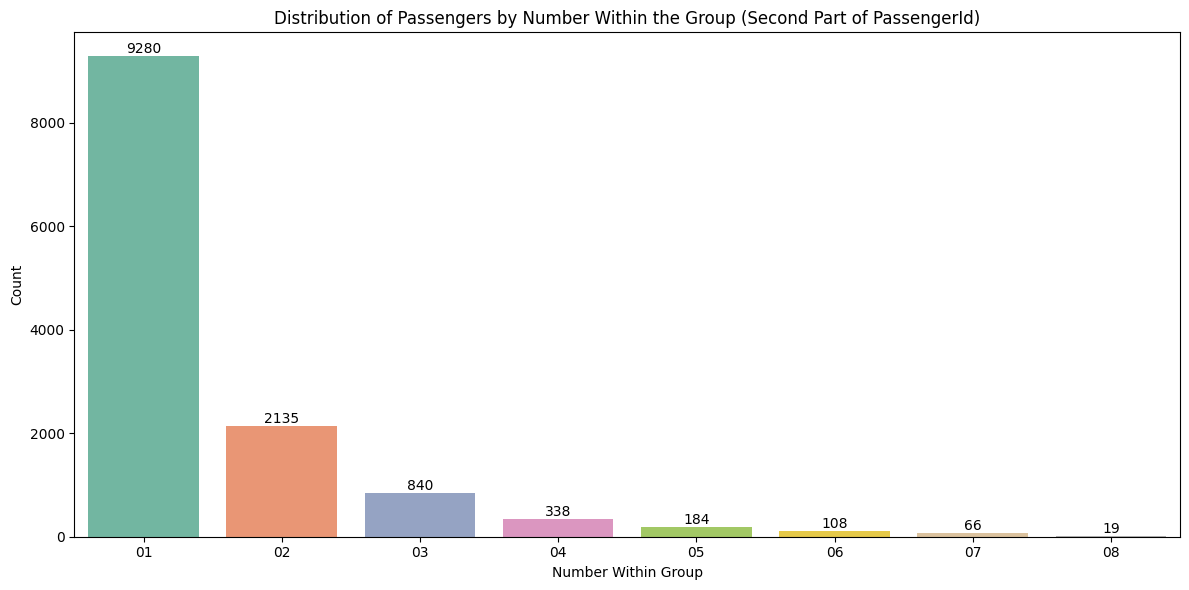

In [9]:
# Count the occurrences of each number within the group
number_counts = df['Number'].value_counts()

# Create a bar chart to visualize the distribution of numbers within the group
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Use a color palette for better visualization
colors = sns.color_palette('Set2')

# Create the bar chart
ax = sns.barplot(x=number_counts.index, y=number_counts.values, palette=colors)

# Customize the plot
plt.title('Distribution of Passengers by Number Within the Group (Second Part of PassengerId)')
plt.xlabel('Number Within Group')
plt.ylabel('Count')


# Add values on top of each bar
for p, value in zip(ax.patches, number_counts.values):
    ax.annotate(str(value), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

We created a count plot to visualize both the 'Number' and 'Transported' columns simultaneously. This allowed us to explore how passenger numbers and group identifiers relate to their transported status. Count values were displayed on the bars for clarity.

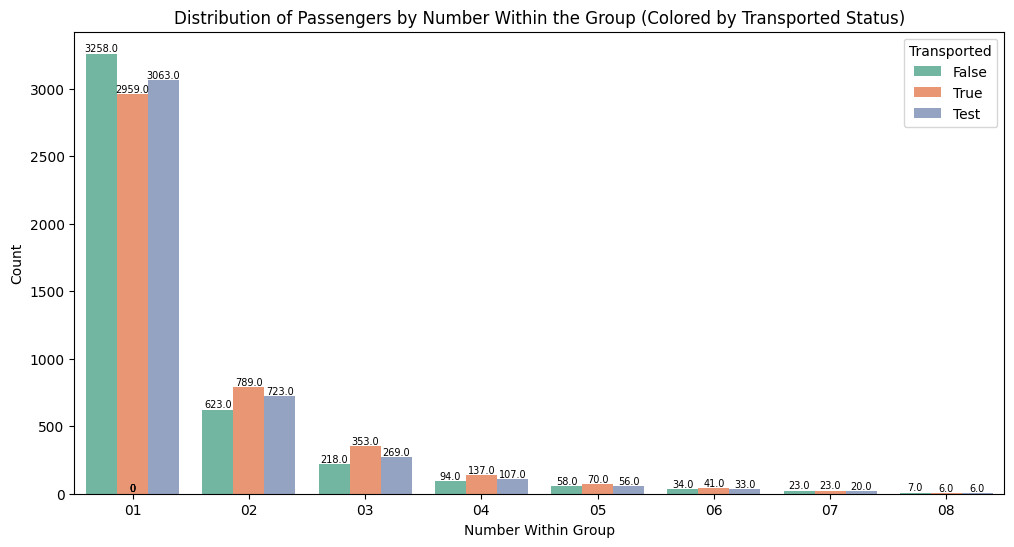

In [10]:
# Create a bar chart to visualize both "Number" and "Transported" columns with count values on the bars
plt.figure(figsize=(12, 6))

ax = sns.countplot(data=df, x='Number', hue='Transported', palette='Set2')

# Add count values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize = 7)

plt.title('Distribution of Passengers by Number Within the Group (Colored by Transported Status)')
plt.xlabel('Number Within Group')
plt.ylabel('Count')
plt.legend(title='Transported', loc='upper right')
plt.show()

## HomePlanet Analysis:
In the analysis of the 'HomePlanet' feature, we aim to gain insights into the distribution of passengers' home planets and how this information might relate to their likelihood of being transported.

In [11]:
df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', 'Unknown'], dtype=object)

Upon inspecting the 'HomePlanet' feature in the dataset, it was observed that it contained four unique values: 'Earth,' 'Mars,' 'Europa,' and NaN (missing values). To ensure comprehensive analysis and avoid information loss, a decision was made to treat the missing values (NaNs) as a distinct category labeled 'Unknown.'

By assigning a category for missing values ('NaN'), we maintain all available data points and effectively account for the uncertainty associated with those missing values. This approach enables us to include the missing data in our analysis, allowing us to consider the possibility that some passengers may not have their home planet information recorded. Consequently, 'NaN' becomes a meaningful category within the 'HomePlanet' feature, contributing to a more thorough examination of the dataset.

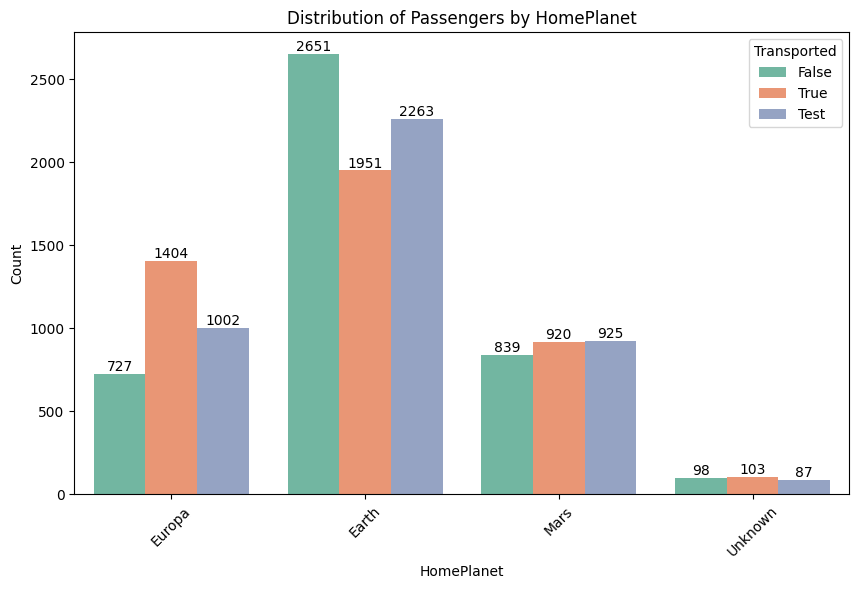

In [12]:

# Plot the distribution of the "HomePlanet" column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='HomePlanet', palette='Set2', hue='Transported')
plt.title('Distribution of Passengers by HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Annotate the bars with count values
for p in ax.patches:
    if p.get_height() > 0:  # Exclude bars with a count of 0
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)



plt.show()

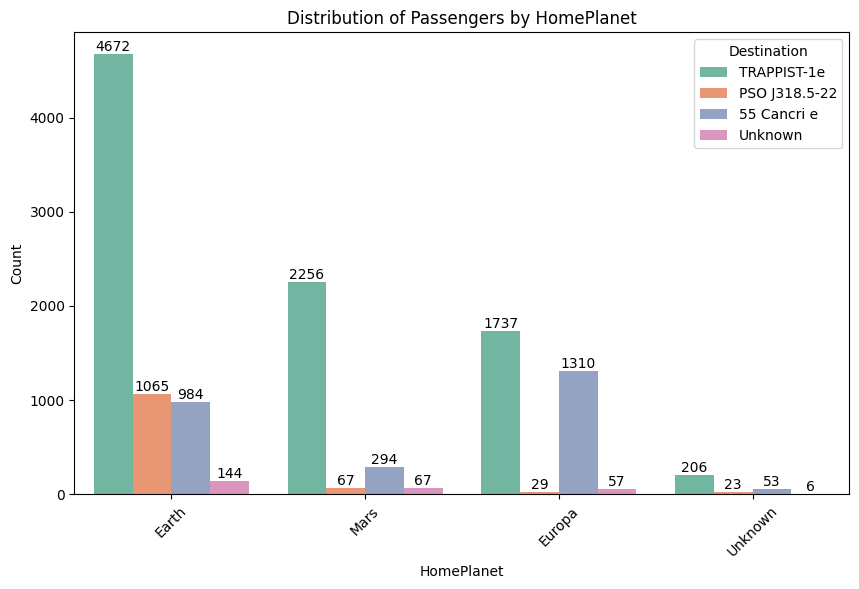

In [13]:

# Plot the distribution of the "HomePlanet" column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='HomePlanet', palette='Set2', order=['Earth', 'Mars', 'Europa', 'Unknown'], hue='Destination')
plt.title('Distribution of Passengers by HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Annotate the bars with count values
for p in ax.patches:
    if p.get_height() > 0:  # Exclude bars with a count of 0
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

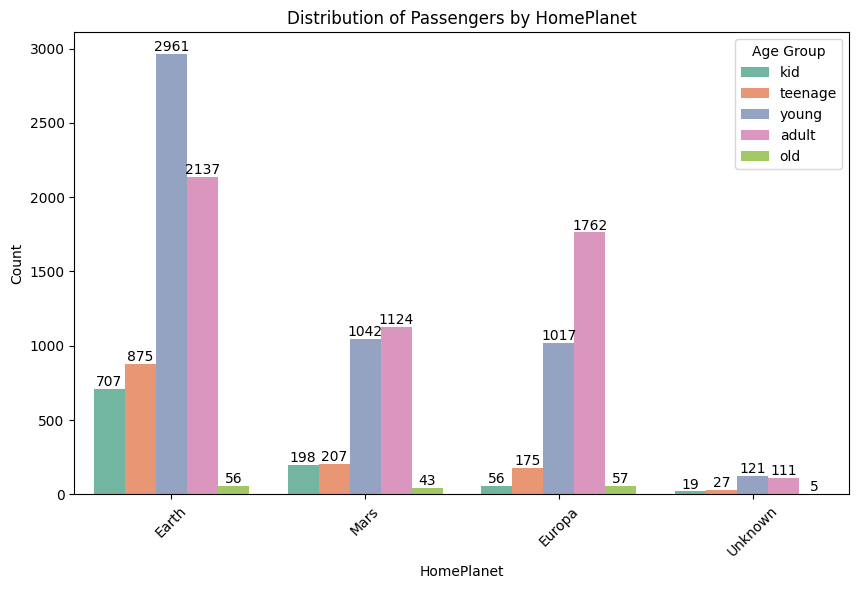

In [14]:

# Plot the distribution of the "HomePlanet" column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='HomePlanet', palette='Set2', order=['Earth', 'Mars', 'Europa', 'Unknown'], hue='Age Group')
plt.title('Distribution of Passengers by HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Annotate the bars with count values
for p in ax.patches:
    if p.get_height() > 0:  # Exclude bars with a count of 0
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

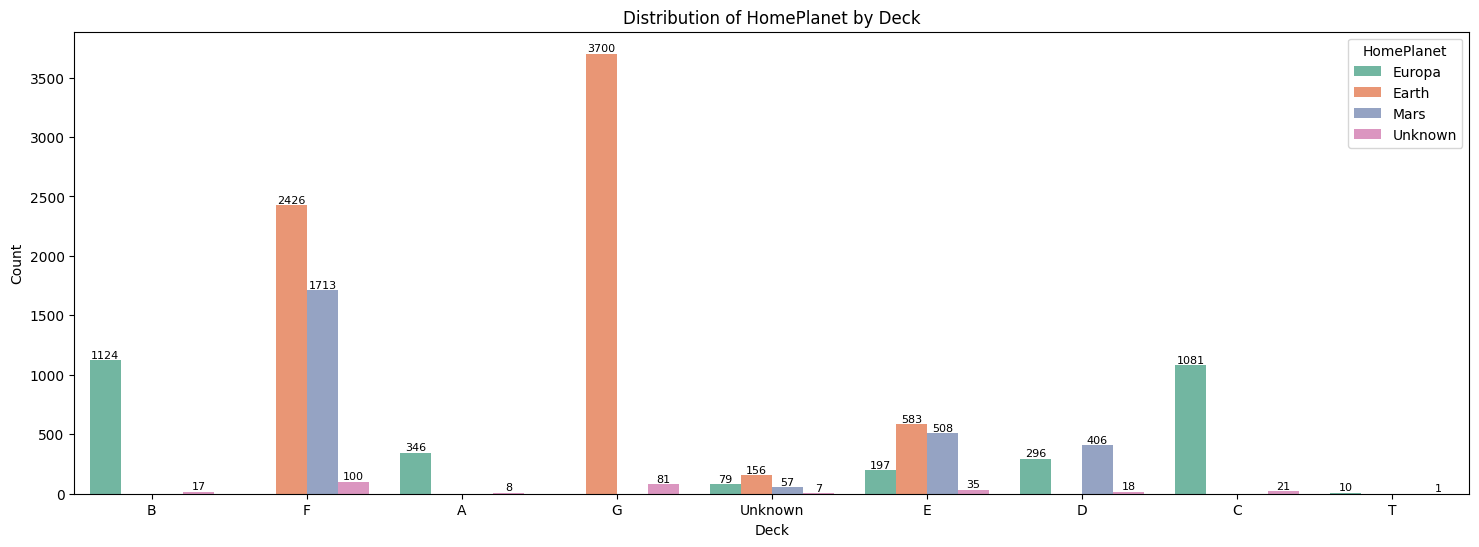

In [15]:
# Plot the distribution of the "HomePlanet" column
plt.figure(figsize=(18, 6))
ax = sns.countplot(data=df, x='Deck', palette='Set2', hue='HomePlanet')
plt.title('Distribution of HomePlanet by Deck')
plt.xlabel('Deck')
plt.ylabel('Count')
#plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Annotate the bars with count values
for p in ax.patches:
    if p.get_height() > 0:  # Exclude bars with a count of 0
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

plt.show()

- Examples with 'Destination': 'PSO J318.5-22' will be labeled as 'Earth,' and those with '55 Cancri e' will be labeled as 'Europa.'
- Examples with 'Deck' values 'B,' 'A,' 'C,' or 'T' will be labeled as 'Europa,' while those with 'G' will be labeled as 'Earth.'
- Examples with 'Age Group' values 'kid' or 'teenage' will be labeled as 'Earth.'

In [16]:
for index, row in df[df['HomePlanet'] == 'Unknown'].iterrows():
    
    if row['Destination'] == 'PSO J318.5-22':
        df['HomePlanet'][index] = 'Earth'

    if row['Destination'] == '55 Cancri e':
        df['HomePlanet'][index] = 'Europa'

    if row['Age Group'] == 'kid' or row['Age Group'] == 'teenage':
        df['HomePlanet'][index] = 'Earth'

    if row['Deck'] == 'B' or 'A' or 'C' or 'T':
        df['HomePlanet'][index] = 'Europa'

    if row['Deck'] == 'G':
        df['HomePlanet'][index] = 'Earth'
    

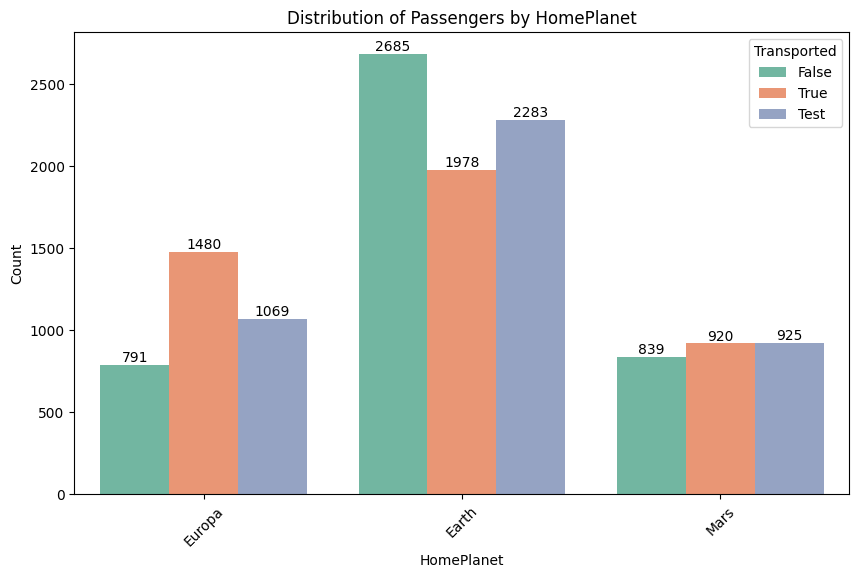

In [17]:
# Plot the distribution of the "HomePlanet" column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='HomePlanet', palette='Set2', hue='Transported')
plt.title('Distribution of Passengers by HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Annotate the bars with count values
for p in ax.patches:
    if p.get_height() > 0:  # Exclude bars with a count of 0
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

## CyroSleep Analysis:
The "CryoSleep" feature indicates whether a passenger elected to be put into suspended animation for the duration of the voyage aboard the Spaceship Titanic. Passengers in cryosleep are confined to their cabins and remain in a state of suspended animation throughout the journey. This feature essentially serves as a binary indicator, with 'True' representing passengers who chose cryosleep and 'False' indicating those who did not opt for it. Understanding the distribution and impact of cryosleep on the likelihood of passengers being transported to an alternate dimension can provide valuable insights for predictive modeling and analysis.

In [18]:
column_info(df)

,Column_name,Data_Type,Count,NaN_Count,Unique_Count,max_value,min_value,sample_value
0,PassengerId,object,12970,0,12970,no value,no value,0044_03
1,HomePlanet,object,12970,0,3,no value,no value,Mars
2,CryoSleep,object,12970,0,3,no value,no value,True
3,Cabin,object,12671,299,9825,no value,no value,D/132/S
4,Destination,object,12970,0,4,no value,no value,55 Cancri e
5,Age,float64,12700,270,80,79.0,0.0,67.0
6,VIP,object,12674,296,2,no value,no value,True
7,RoomService,float64,12707,263,1578,14327.0,0.0,1853.0
8,FoodCourt,float64,12681,289,1953,29813.0,0.0,775.0
9,ShoppingMall,float64,12664,306,1367,23492.0,0.0,53.0


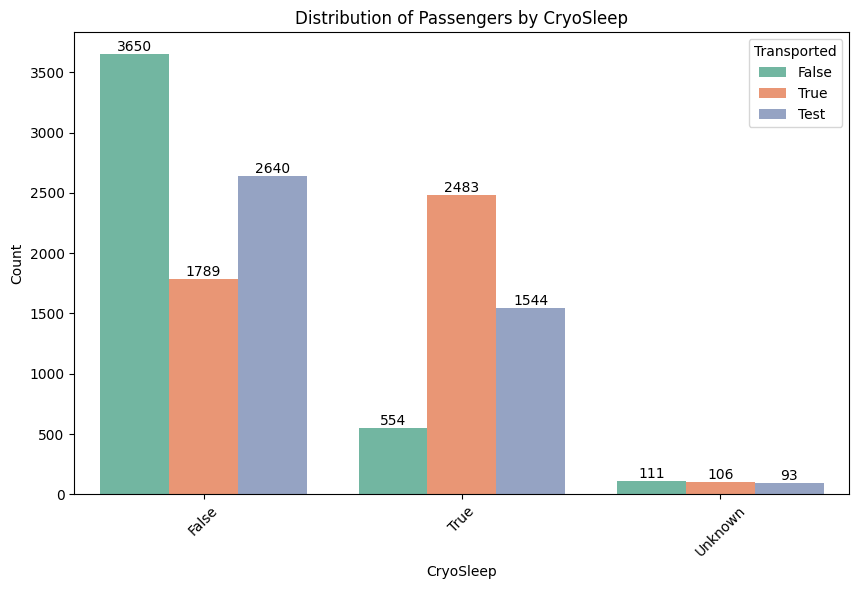

In [19]:
# Plot the distribution of the "HomePlanet" column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='CryoSleep', palette='Set2', hue='Transported')
plt.title('Distribution of Passengers by CryoSleep')
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Annotate the bars with count values
for p in ax.patches:
    if p.get_height() > 0:  # Exclude bars with a count of 0
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

Imputing Missing "CryoSleep" Values Based on Amenities Usage

We have noticed that there are 310 missing (NaN) values in the "CryoSleep" feature. To impute these missing values, we will examine the values of other features related to onboard amenities: "RoomService," "FoodCourt," "ShoppingMall," "Spa," and "VRDeck."

If all of these amenities for a passenger have a value of 0, it suggests that the passenger did not use any amenities during their voyage. In such cases, we will assume that the passenger chose to be in cryosleep (CryoSleep = True).
If at least one of these amenities has a non-zero value, it suggests that the passenger did not choose cryosleep but instead remained active (CryoSleep = False).

In [20]:
# Define the list of amenities columns
amenities_columns = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

# Create a mask to identify passengers with missing "CryoSleep" values
missing_cryosleep_mask = df['CryoSleep'] == 'Unknown'
# Create a mask to identify passengers who did not use any amenities (all values are 0)
no_amenities_mask = (df[amenities_columns] == 0).all(axis=1)

# Fill missing "CryoSleep" values for passengers with no amenities usage (CryoSleep = True)
df.loc[no_amenities_mask & missing_cryosleep_mask, "CryoSleep"] = True

# Fill missing "CryoSleep" values for passengers with amenities usage (CryoSleep = False)
df.loc[~no_amenities_mask & missing_cryosleep_mask, "CryoSleep"] = False

# Check if there are any remaining missing values in "CryoSleep"
missing_cryosleep_count = df['CryoSleep'].isna().sum()
print(f"Missing 'CryoSleep' values after imputation: {missing_cryosleep_count}")


Missing 'CryoSleep' values after imputation: 0


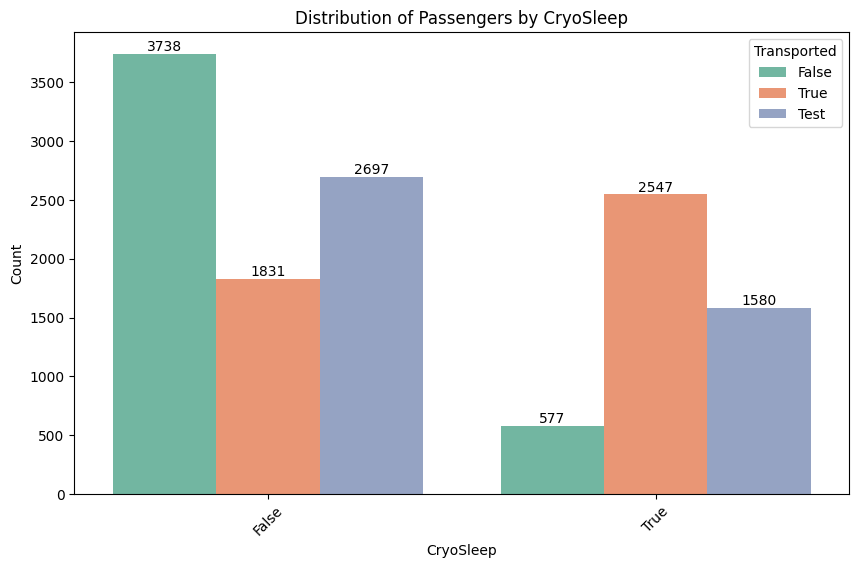

In [21]:
# Plot the distribution of the "HomePlanet" column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='CryoSleep', palette='Set2', hue='Transported')
plt.title('Distribution of Passengers by CryoSleep')
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Annotate the bars with count values
for p in ax.patches:
    if p.get_height() > 0:  # Exclude bars with a count of 0
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

## Cabin Analysis:
The "Cabin" feature in the dataset represents the cabin number where each passenger is staying on the Spaceship Titanic. This feature provides information about the location of passengers within the ship, which can be valuable for understanding potential patterns or characteristics related to the passengers' accommodations. In this analysis, we will explore and process the "Cabin" feature to extract relevant insights and prepare the data for modeling.

In [22]:
column_info(df)

,Column_name,Data_Type,Count,NaN_Count,Unique_Count,max_value,min_value,sample_value
0,PassengerId,object,12970,0,12970,no value,no value,0581_01
1,HomePlanet,object,12970,0,4,no value,no value,Europa
2,CryoSleep,object,12970,0,2,no value,no value,False
3,Cabin,object,12671,299,9825,no value,no value,G/523/S
4,Destination,object,12970,0,4,no value,no value,Unknown
5,Age,float64,12700,270,80,79.0,0.0,20.0
6,VIP,object,12674,296,2,no value,no value,True
7,RoomService,float64,12707,263,1578,14327.0,0.0,1184.0
8,FoodCourt,float64,12681,289,1953,29813.0,0.0,1652.0
9,ShoppingMall,float64,12664,306,1367,23492.0,0.0,1322.0


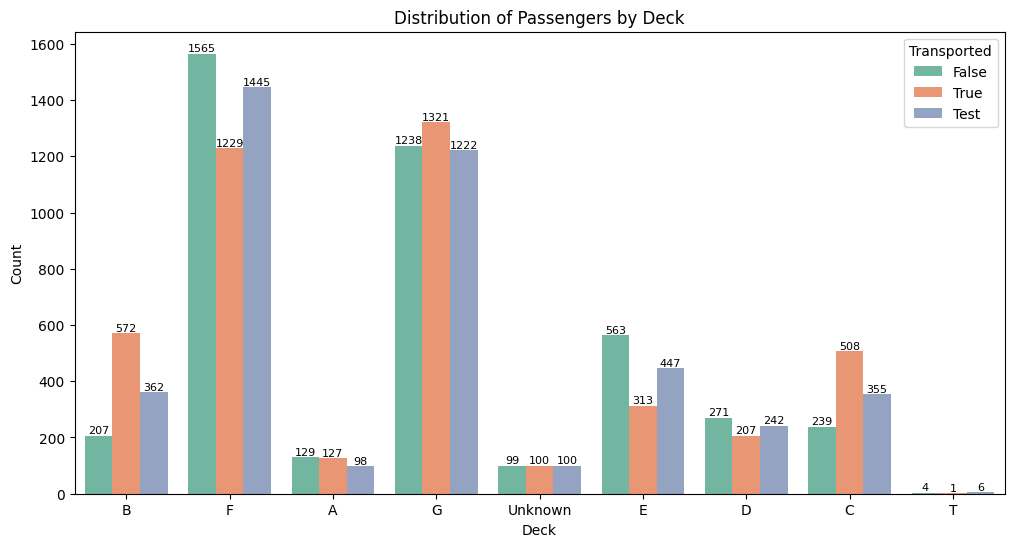

In [23]:
# Plot the distribution of the "HomePlanet" column
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Deck', palette='Set2', hue='Transported')
plt.title('Distribution of Passengers by Deck')
plt.xlabel('Deck')
plt.ylabel('Count')
#plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Annotate the bars with count values
for p in ax.patches:
    if p.get_height() > 0:  # Exclude bars with a count of 0
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

plt.show()

We are going to assign null values as 'F' and 'G' randomly

In [24]:
df['Deck'].replace('Unknown', random.choice(['F','G']), inplace=True)

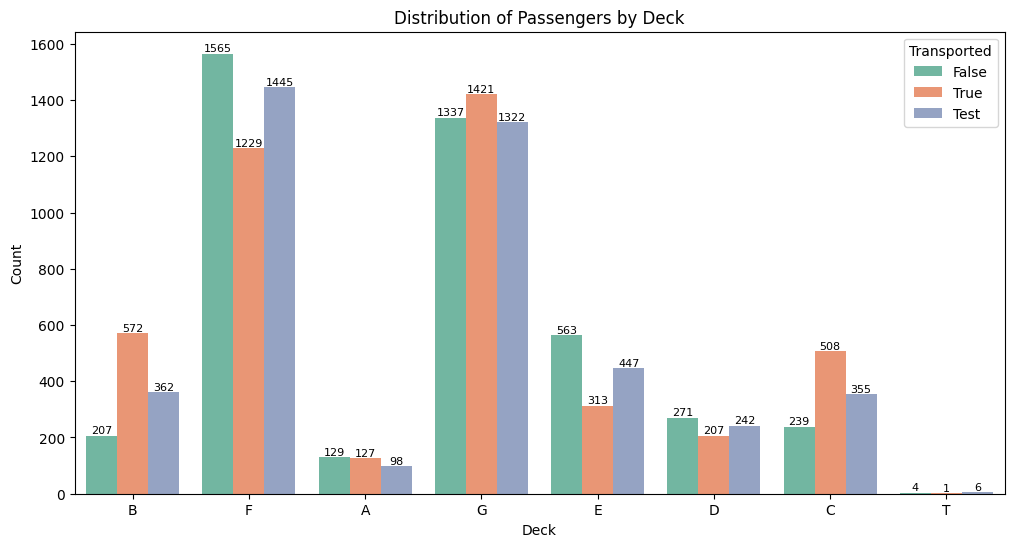

In [25]:
# Plot the distribution of the "HomePlanet" column
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Deck', palette='Set2', hue='Transported')
plt.title('Distribution of Passengers by Deck')
plt.xlabel('Deck')
plt.ylabel('Count')
#plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Annotate the bars with count values
for p in ax.patches:
    if p.get_height() > 0:  # Exclude bars with a count of 0
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

plt.show()

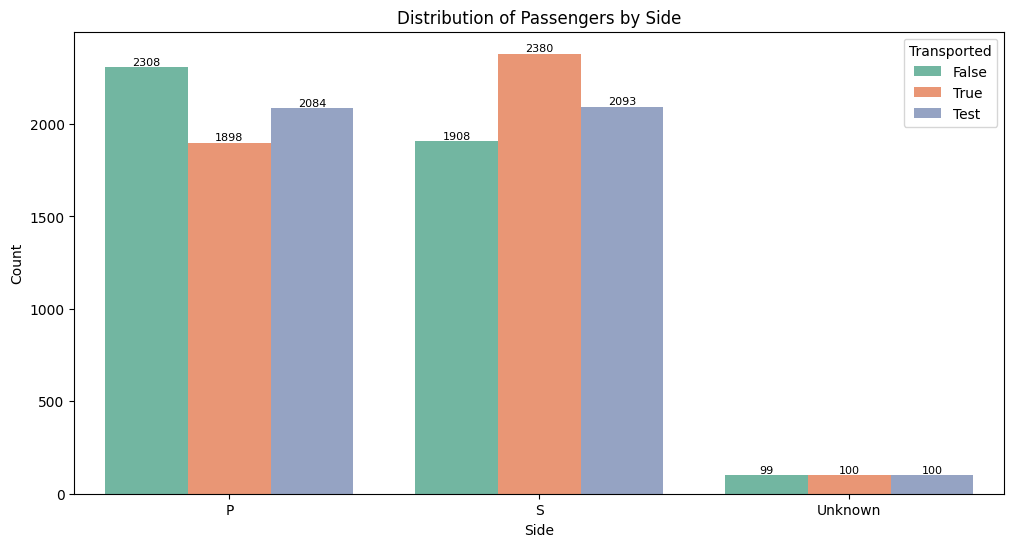

In [26]:
# Plot the distribution of the "HomePlanet" column
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Side', palette='Set2', hue='Transported')
plt.title('Distribution of Passengers by Side')
plt.xlabel('Side')
plt.ylabel('Count')


# Annotate the bars with count values
for p in ax.patches:
    if p.get_height() > 0:  # Exclude bars with a count of 0
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

plt.show()

We are going to assign null values as 'F' and 'G' randomly, And assign 'P' as 0, 'S' as 1. Than that feature will be ready for training.

In [27]:
df['Side'].replace('Unknown',random.choice(['P','S']), inplace=True)

In [28]:
df['Side'].replace({'P':0, 'S':1}, inplace=True)

In [29]:
df['CabinNumber'] = pd.to_numeric(df['CabinNumber'], errors='coerce')  # 'coerce' converts non-numeric values to NaN

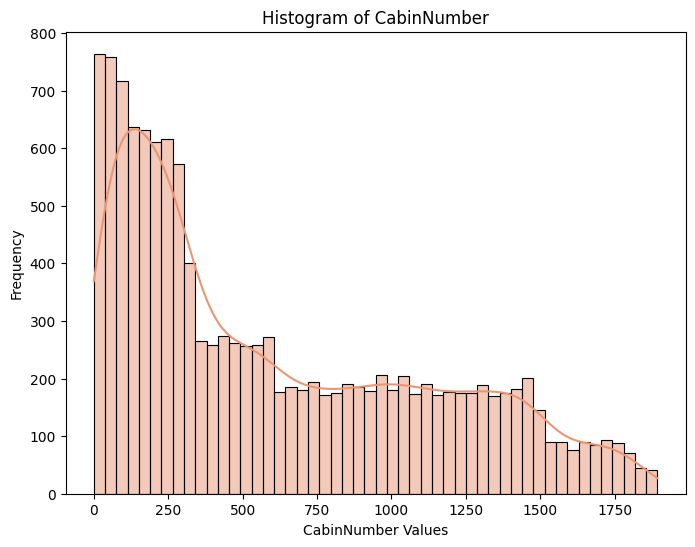

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(df['CabinNumber'], bins=50, kde = True, color='#e99674')
plt.title('Histogram of CabinNumber')
plt.xlabel('CabinNumber Values')
plt.ylabel('Frequency')
plt.show()

In [31]:
value_counts = df['CabinNumber'].value_counts()
top_5_values = value_counts.head(5)

In [32]:
df['CabinNumber'].fillna(np.random.choice(top_5_values), inplace=True)

## Destination Analysis:
This feature represents the planet to which each passenger will be disembarking after the Spaceship Titanic's voyage. It provides insights into the final destinations of passengers and can be used to explore whether specific planets are associated with a higher likelihood of passengers being transported to an alternate dimension during the ship's collision with a spacetime anomaly.

In [33]:
column_info(df)

,Column_name,Data_Type,Count,NaN_Count,Unique_Count,max_value,min_value,sample_value
0,PassengerId,object,12970,0,12970,no value,no value,1074_01
1,HomePlanet,object,12970,0,4,no value,no value,Mars
2,CryoSleep,object,12970,0,2,no value,no value,False
3,Cabin,object,12671,299,9825,no value,no value,E/563/P
4,Destination,object,12970,0,4,no value,no value,55 Cancri e
5,Age,float64,12700,270,80,79.0,0.0,0.0
6,VIP,object,12674,296,2,no value,no value,True
7,RoomService,float64,12707,263,1578,14327.0,0.0,3905.0
8,FoodCourt,float64,12681,289,1953,29813.0,0.0,3326.0
9,ShoppingMall,float64,12664,306,1367,23492.0,0.0,2620.0


In [34]:
df.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', 'Unknown'],
      dtype=object)

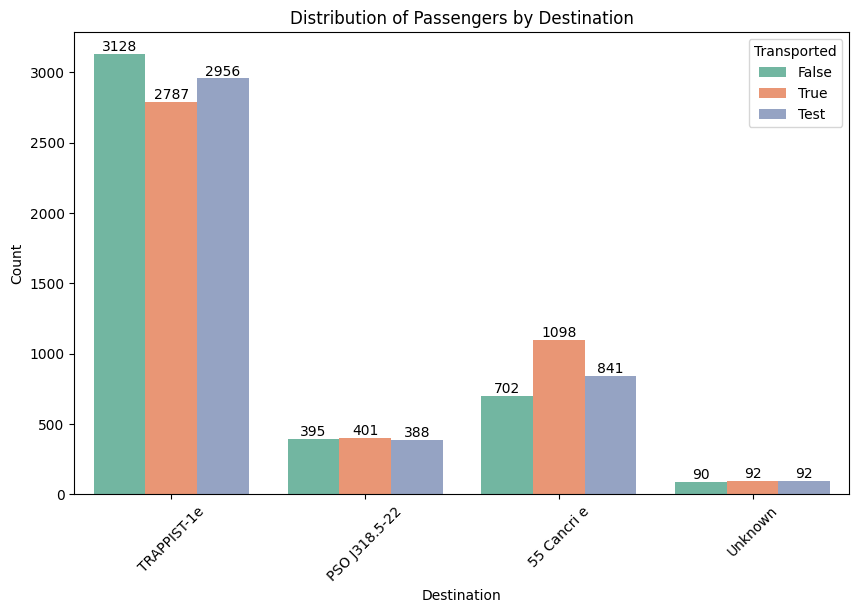

In [35]:
# Plot the distribution of the "HomePlanet" column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Destination', palette='Set2', order=['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', 'Unknown'], hue='Transported')
plt.title('Distribution of Passengers by Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Annotate the bars with count values
for p in ax.patches:
    if p.get_height() > 0:  # Exclude bars with a count of 0
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

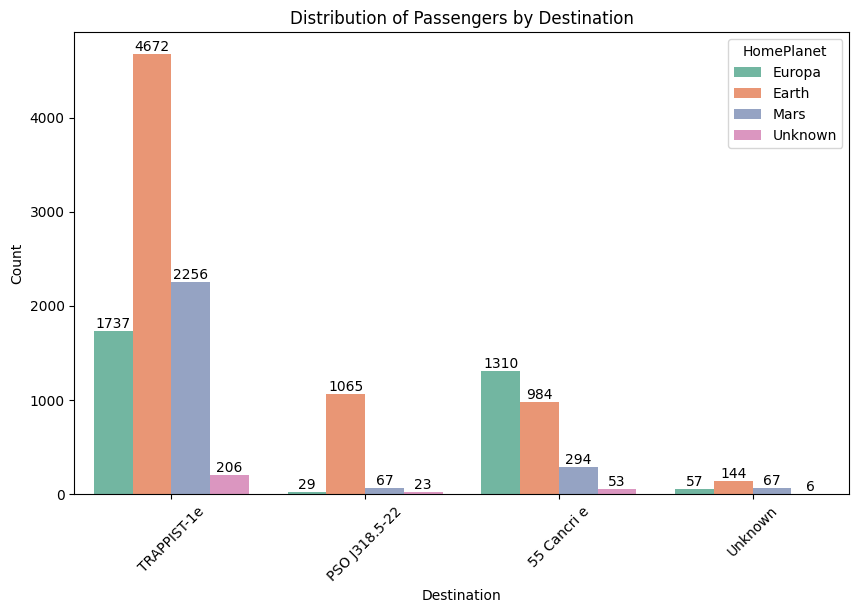

In [36]:
# Plot the distribution of the "HomePlanet" column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Destination', palette='Set2', hue='HomePlanet')
plt.title('Distribution of Passengers by Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Annotate the bars with count values
for p in ax.patches:
    if p.get_height() > 0:  # Exclude bars with a count of 0
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

In [37]:
df['Destination'].replace('Unknown','PSO J318.5-22', inplace=True)

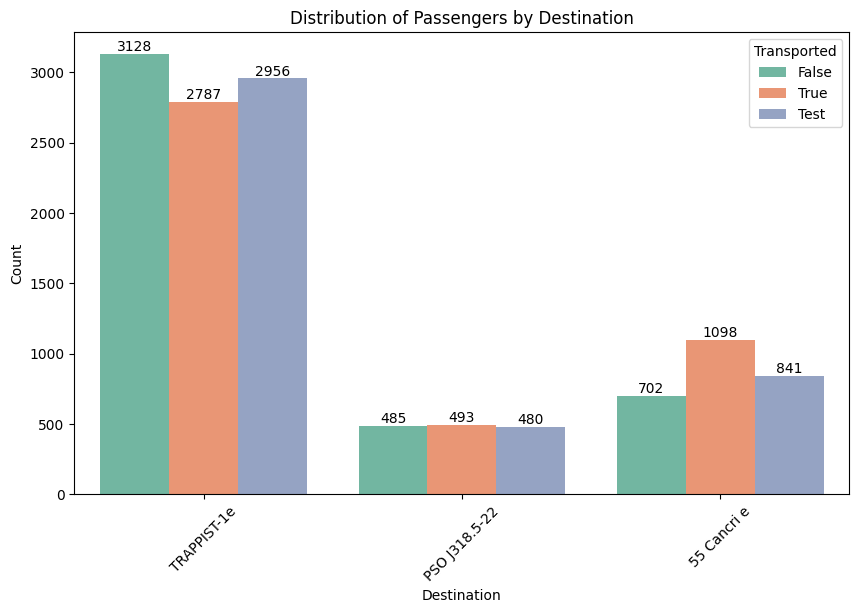

In [38]:
# Plot the distribution of the "HomePlanet" column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Destination', palette='Set2', hue='Transported')
plt.title('Distribution of Passengers by Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Annotate the bars with count values
for p in ax.patches:
    if p.get_height() > 0:  # Exclude bars with a count of 0
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

## Age Analysis: 
The "Age" feature in the dataset represents the age of each passenger on the Spaceship Titanic. Analyzing this feature is essential because age can play a crucial role in understanding passenger demographics and their likelihood of being transported to another dimension during the ship's collision with a spacetime anomaly. We'll explore the distribution of ages, handle missing values if necessary, and investigate how age relates to the likelihood of being transported.

we will create a box plot to visualize the distribution of ages among passengers on the Spaceship Titanic. This plot will help us identify any outliers and understand the central tendency and spread of age values in the dataset. We will use this visualization as a starting point for further analysis of the "Age" feature.

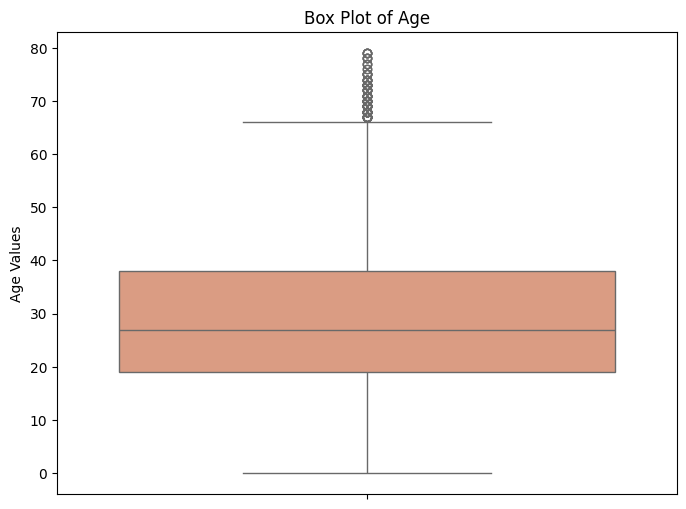

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Age', color='#e99674')
plt.title('Box Plot of Age')
plt.ylabel('Age Values')
plt.show()

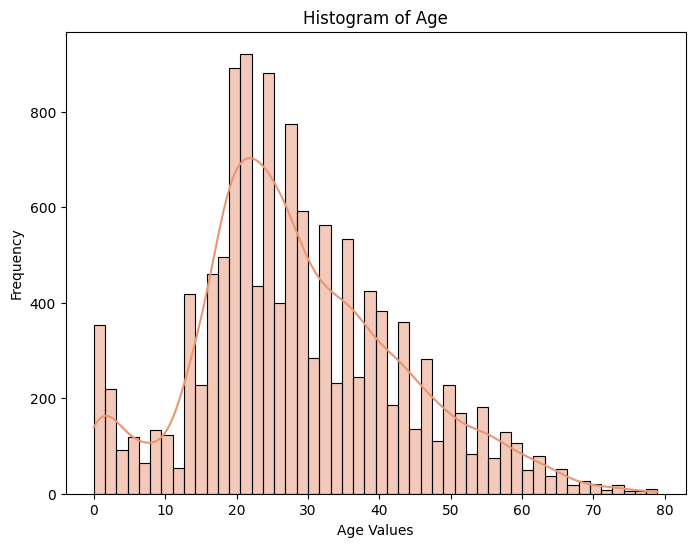

In [40]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=50, kde=True,color='#e99674')
plt.title('Histogram of Age')
plt.xlabel('Age Values')
plt.ylabel('Frequency')
plt.show()

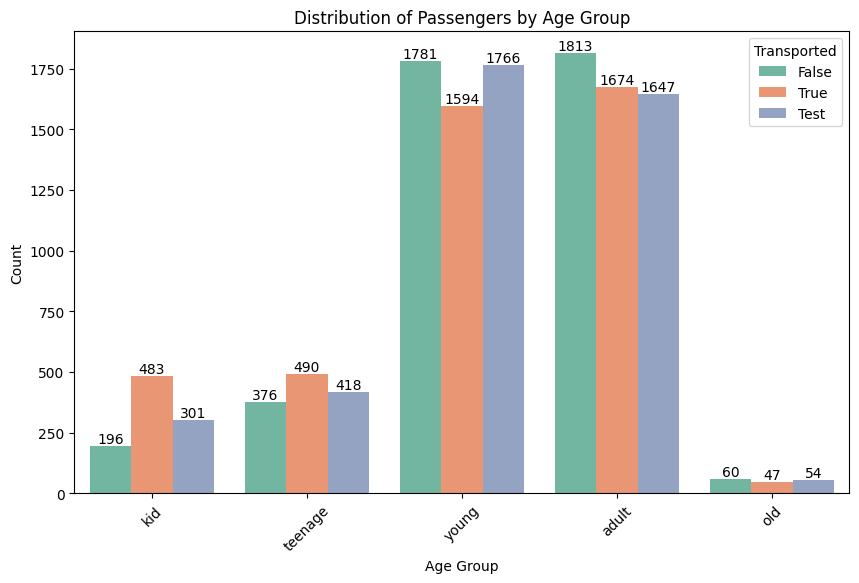

In [41]:
# Plot the distribution of the "HomePlanet" column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Age Group', palette='Set2', hue='Transported')
plt.title('Distribution of Passengers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Annotate the bars with count values
for p in ax.patches:
    if p.get_height() > 0:  # Exclude bars with a count of 0
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

We have created a new column called 'TotalServices' by aggregating the services passengers used during their voyage, including 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', and 'VRDeck'. To gain insights into how different age groups utilized these amenities, we visualized the data using a box plot.

In the box plot, each box represents an age group: kids, teenagers, young, adult, and old individuals. The vertical axis represents the total services utilized, while the horizontal axis shows the age groups. The plot provides a visual comparison of service utilization patterns among different age groups, helping us understand the preferences and behaviors of passengers based on their age during the Spaceship Titanic's voyage.

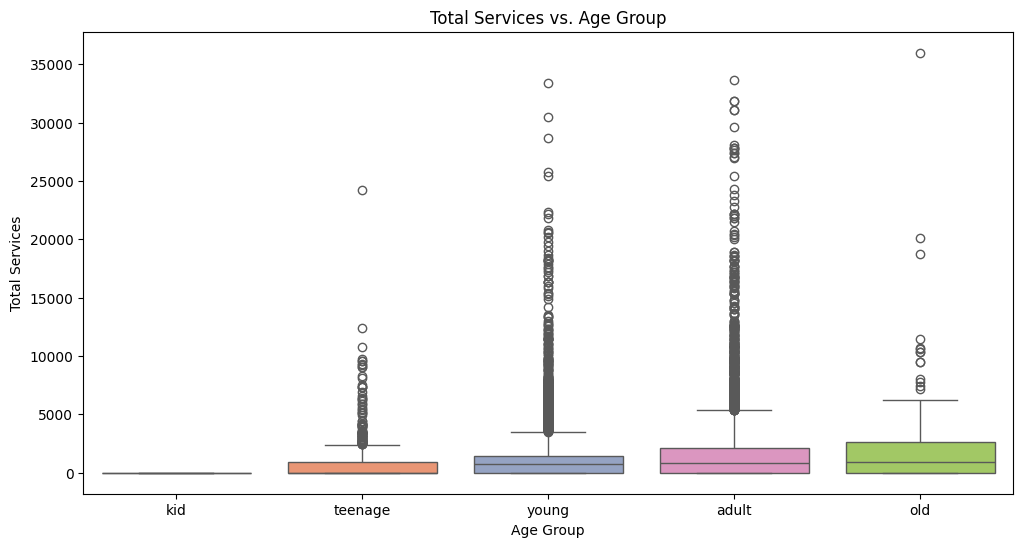

In [42]:


# Now, let's visualize 'TotalServices' by age groups using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age Group', y='TotalServices', palette='Set2')
plt.title('Total Services vs. Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Services')
plt.show()


In [43]:
average_services_by_age_group = df.groupby('Age Group')['TotalServices'].mean()
average_services_by_age_group

Age Group
kid           0.000000
teenage     745.033489
young      1356.931142
adult      1930.660304
old        2300.335404
Name: TotalServices, dtype: float64

To further explore the relationship between age groups and the total services utilized, we calculated the average 'TotalServices' for each age group. This calculation allows us to discern patterns and tendencies in service utilization among passengers of different ages during their journey.

Once we have these average values, we can use them to fill missing 'TotalServices' values based on the passenger's age group. This approach ensures that the imputed values are informed by the typical service utilization behavior of passengers within the same age category, providing a more accurate representation of the data while addressing missing values effectively.

In [44]:
def fill_age_based_on_totalservices(row):
    total_services = row['TotalServices']
    if np.isnan(row['Age']):
        if total_services < 745:
            return np.random.randint(0, 11)  # Random between 0 and 10
        elif 745 <= total_services < 1356:
            return np.random.randint(10, 19)  # Random between 10 and 18
        elif 1356 <= total_services < 1960:
            return np.random.randint(18, 31)  # Random between 18 and 30
        elif 1960 <= total_services < 2878:
            return np.random.randint(30, 66)  # Random between 30 and 40
        else:
            return np.random.randint(65, 81)  # Random between 40 and 80
    else:
        return row['Age']

# Apply the custom function to fill NaN values in 'Age'
df['Age'] = df.apply(fill_age_based_on_totalservices, axis=1)


In [45]:
df['Age'].isna().sum()

0

The 'Age' feature in the dataset is originally based on years, but we noticed that some passengers have zero values. To address this issue and ensure a more plausible representation of passenger ages, we made a creative adjustment.

First, we introduced a new way of measuring age by considering lunar months (moons). This alternative approach allows us to estimate ages in a more sci-fi and space-themed manner, which aligns with the context of the Spaceship Titanic journey.

For the passengers with 'Age' values of 0, we assigned ages randomly within the range of 1 to 12 lunar months, simulating the possibility of newborns or very young passengers who couldn't be accurately aged in years.

By implementing this adjustment, we maintain consistency with the dataset's theme and create a more realistic distribution of passenger ages, which can be crucial for accurate model training and predictions

In [46]:
df['Age'] = df['Age']*12

df['Age'] = df['Age'].apply(lambda age: age + random.randint(1, 12) if age == 0 else age)

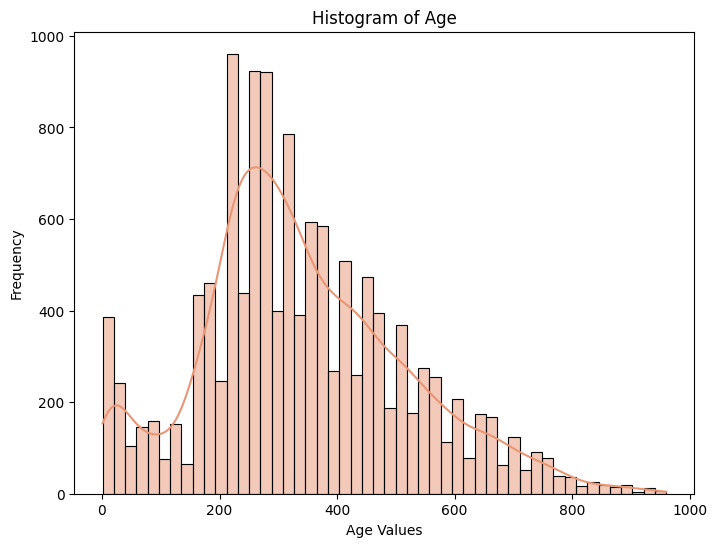

In [47]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=50, kde=True ,color='#e99674')
plt.title('Histogram of Age')
plt.xlabel('Age Values')
plt.ylabel('Frequency')
plt.show()

In [48]:
print('Maximum Age: ', df.Age.max())
print('Minimum Age: ', df.Age.min())

Maximum Age:  960.0
Minimum Age:  1.0


In [49]:
column_info(df)

,Column_name,Data_Type,Count,NaN_Count,Unique_Count,max_value,min_value,sample_value
0,PassengerId,object,12970,0,12970,no value,no value,8468_01
1,HomePlanet,object,12970,0,4,no value,no value,Europa
2,CryoSleep,object,12970,0,2,no value,no value,False
3,Cabin,object,12671,299,9825,no value,no value,F/1504/P
4,Destination,object,12970,0,3,no value,no value,PSO J318.5-22
5,Age,float64,12970,0,91,960.0,1.0,744.0
6,VIP,object,12674,296,2,no value,no value,False
7,RoomService,float64,12707,263,1578,14327.0,0.0,1489.0
8,FoodCourt,float64,12681,289,1953,29813.0,0.0,828.0
9,ShoppingMall,float64,12664,306,1367,23492.0,0.0,729.0


## VIP Analysis:

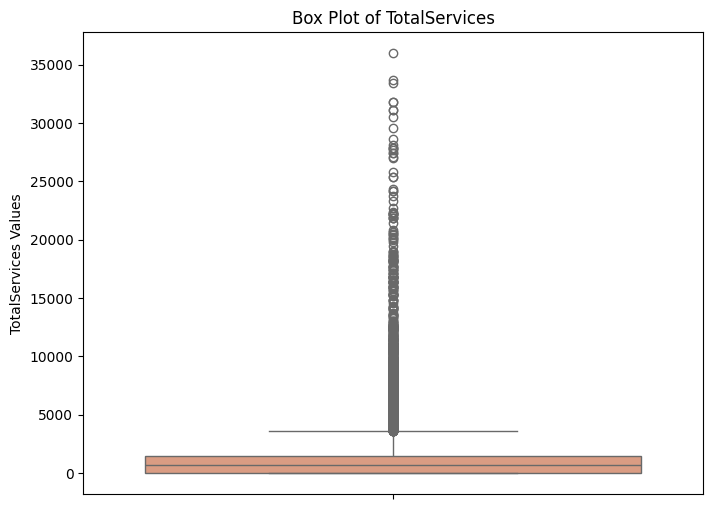

In [50]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=df, y='TotalServices', color='#e99674')
plt.title('Box Plot of TotalServices')
plt.ylabel('TotalServices Values')
plt.show()

In [51]:
q3 = df['TotalServices'].quantile(0.75)
print(f'Q3 (Third Quartile) Level: {q3}')

Q3 (Third Quartile) Level: 1442.0


In [52]:
df['VIP'].isnull().sum()

296

If a Passenger spent more than q3 of Totalservices its mean this passenger can be VIP.

In [53]:

# Fill NaN values in 'VIP' based on the condition
df['VIP'].fillna(df['TotalServices'].apply(lambda x: True if x > q3 else False), inplace=True)

In [54]:
column_info(df)

,Column_name,Data_Type,Count,NaN_Count,Unique_Count,max_value,min_value,sample_value
0,PassengerId,object,12970,0,12970,no value,no value,7356_01
1,HomePlanet,object,12970,0,4,no value,no value,Earth
2,CryoSleep,object,12970,0,2,no value,no value,True
3,Cabin,object,12671,299,9825,no value,no value,G/699/S
4,Destination,object,12970,0,3,no value,no value,TRAPPIST-1e
5,Age,float64,12970,0,91,960.0,1.0,888.0
6,VIP,bool,12970,0,2,True,False,True
7,RoomService,float64,12707,263,1578,14327.0,0.0,2508.0
8,FoodCourt,float64,12681,289,1953,29813.0,0.0,375.0
9,ShoppingMall,float64,12664,306,1367,23492.0,0.0,2621.0


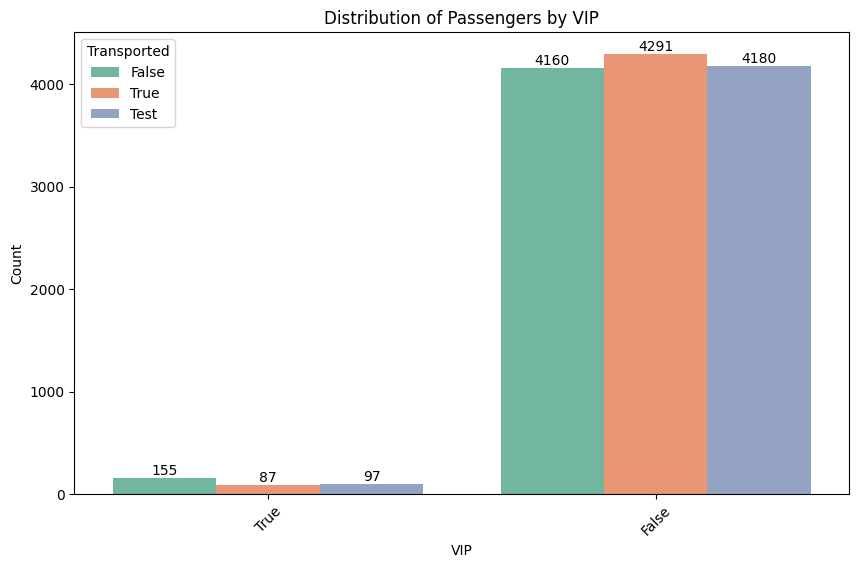

In [55]:
# Plot the distribution of the "HomePlanet" column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='VIP', palette='Set2', order=[True, False], hue='Transported')
plt.title('Distribution of Passengers by VIP')
plt.xlabel('VIP')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Annotate the bars with count values
for p in ax.patches:
    if p.get_height() > 0:  # Exclude bars with a count of 0
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

## RoomService Analysis:

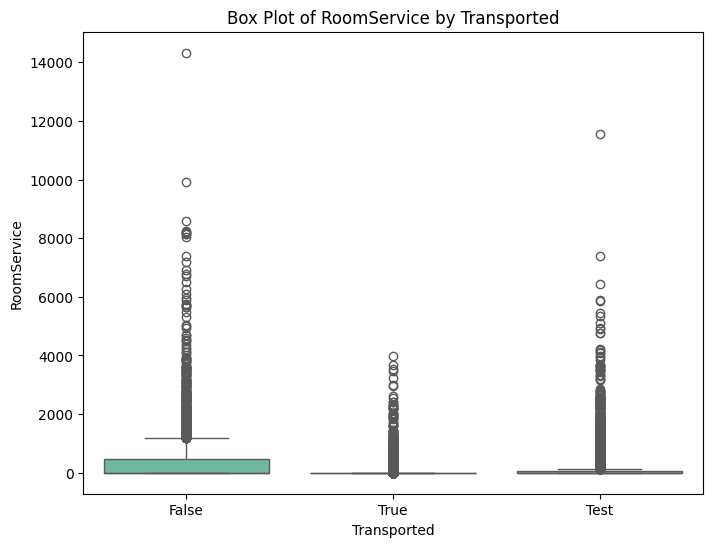

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='RoomService', x='Transported', palette='Set2')
plt.title('Box Plot of RoomService by Transported')
plt.show()

In [57]:
df['RoomService'].fillna(0, inplace=True)

In [58]:
column_info(df)

,Column_name,Data_Type,Count,NaN_Count,Unique_Count,max_value,min_value,sample_value
0,PassengerId,object,12970,0,12970,no value,no value,4508_01
1,HomePlanet,object,12970,0,4,no value,no value,Mars
2,CryoSleep,object,12970,0,2,no value,no value,False
3,Cabin,object,12671,299,9825,no value,no value,D/54/P
4,Destination,object,12970,0,3,no value,no value,PSO J318.5-22
5,Age,float64,12970,0,91,960.0,1.0,924.0
6,VIP,bool,12970,0,2,True,False,True
7,RoomService,float64,12970,0,1578,14327.0,0.0,1371.0
8,FoodCourt,float64,12681,289,1953,29813.0,0.0,1297.0
9,ShoppingMall,float64,12664,306,1367,23492.0,0.0,419.0


## FoodCourt Analysis:

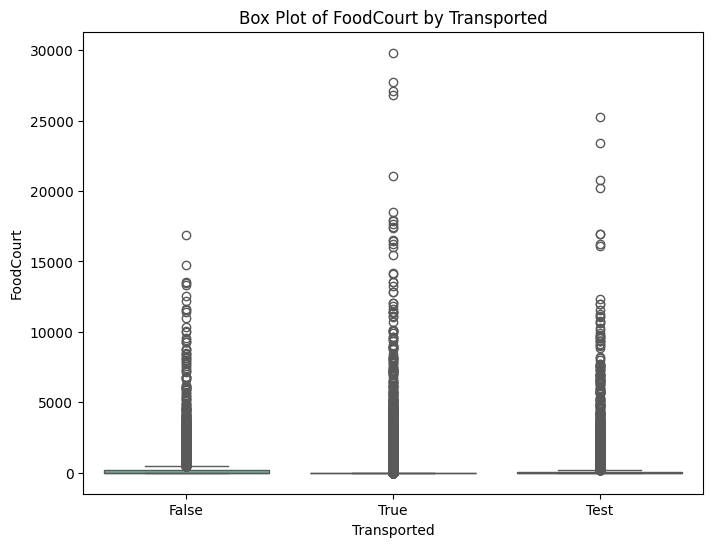

In [59]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='FoodCourt', x='Transported', palette='Set2')
plt.title('Box Plot of FoodCourt by Transported')
plt.show()

In [60]:
df['FoodCourt'].fillna(0, inplace=True)

## ShoppingMall	Analysis:

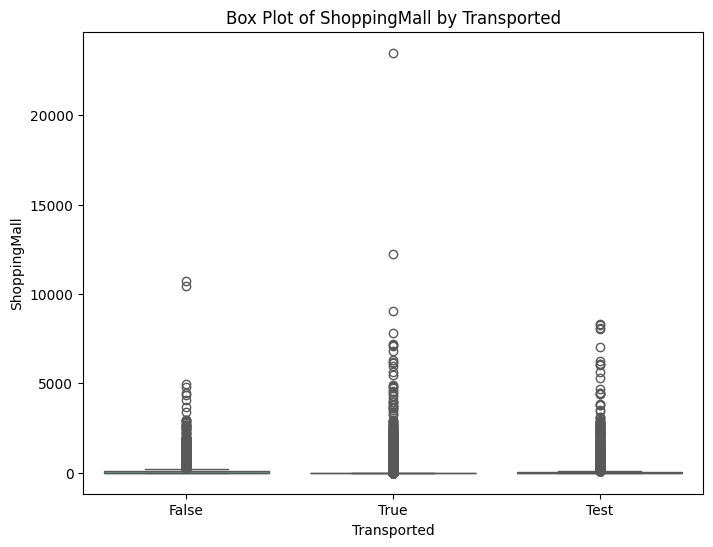

In [61]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='ShoppingMall', x='Transported', palette='Set2')
plt.title('Box Plot of ShoppingMall by Transported')
plt.show()

In [62]:
df['ShoppingMall'].fillna(0, inplace=True)

## Spa Analysis

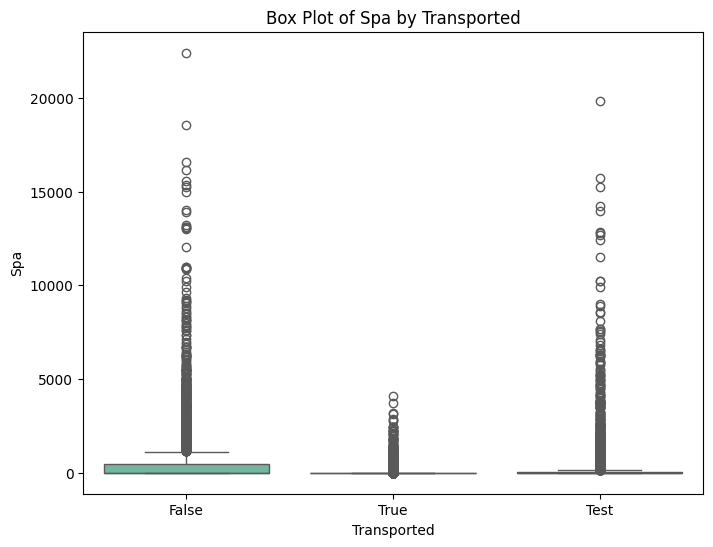

In [63]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Spa', x='Transported', palette='Set2')
plt.title('Box Plot of Spa by Transported')
plt.show()

In [64]:
df['Spa'].fillna(0, inplace=True)

## VRDeck Analysis

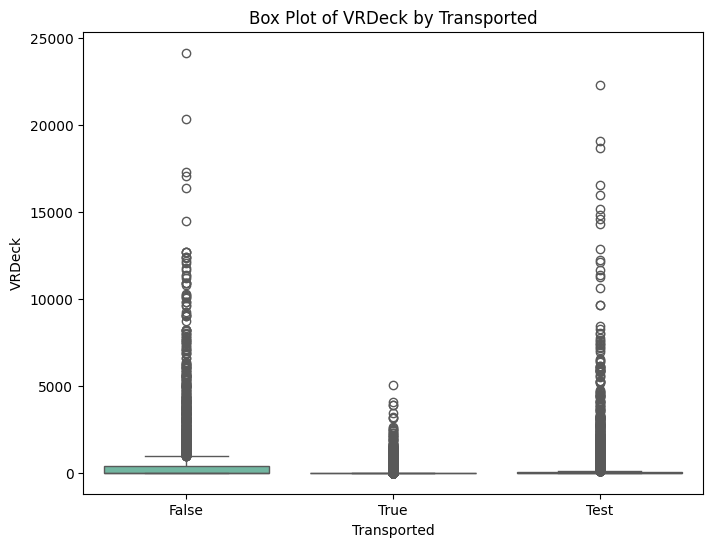

In [65]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='VRDeck', x='Transported', palette='Set2')
plt.title('Box Plot of VRDeck by Transported')
plt.show()

In [66]:
df['VRDeck'].fillna(0, inplace=True)

## Transported Analysis:

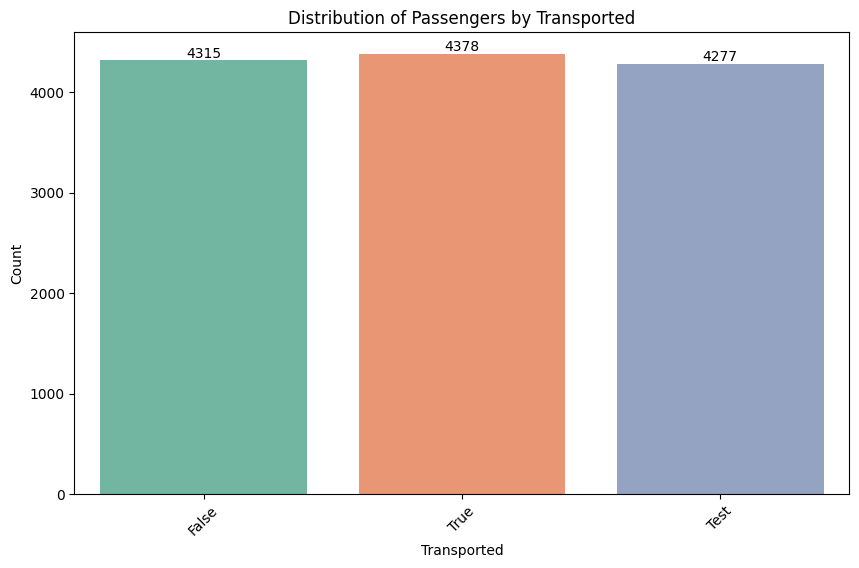

In [67]:
# Plot the distribution of the "HomePlanet" column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Transported', palette='Set2')
plt.title('Distribution of Passengers by Transported')
plt.xlabel('Transported')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Annotate the bars with count values
for p in ax.patches:
    if p.get_height() > 0:  # Exclude bars with a count of 0
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

In [68]:
column_info(df)

,Column_name,Data_Type,Count,NaN_Count,Unique_Count,max_value,min_value,sample_value
0,PassengerId,object,12970,0,12970,no value,no value,5035_01
1,HomePlanet,object,12970,0,4,no value,no value,Europa
2,CryoSleep,object,12970,0,2,no value,no value,True
3,Cabin,object,12671,299,9825,no value,no value,F/794/P
4,Destination,object,12970,0,3,no value,no value,PSO J318.5-22
5,Age,float64,12970,0,91,960.0,1.0,144.0
6,VIP,bool,12970,0,2,True,False,True
7,RoomService,float64,12970,0,1578,14327.0,0.0,35.0
8,FoodCourt,float64,12970,0,1953,29813.0,0.0,1436.0
9,ShoppingMall,float64,12970,0,1367,23492.0,0.0,1232.0


In [69]:
df.drop(columns = ['PassengerId', 'Cabin', 'Name', 'Age Group', 'TotalServices'], inplace=True)

In [70]:
column_info(df)

,Column_name,Data_Type,Count,NaN_Count,Unique_Count,max_value,min_value,sample_value
0,HomePlanet,object,12970,0,4,no value,no value,Mars
1,CryoSleep,object,12970,0,2,no value,no value,True
2,Destination,object,12970,0,3,no value,no value,TRAPPIST-1e
3,Age,float64,12970,0,91,960.0,1.0,9.0
4,VIP,bool,12970,0,2,True,False,True
5,RoomService,float64,12970,0,1578,14327.0,0.0,273.0
6,FoodCourt,float64,12970,0,1953,29813.0,0.0,120.0
7,ShoppingMall,float64,12970,0,1367,23492.0,0.0,1880.0
8,Spa,float64,12970,0,1679,22408.0,0.0,863.0
9,VRDeck,float64,12970,0,1642,24133.0,0.0,491.0


# Training Models

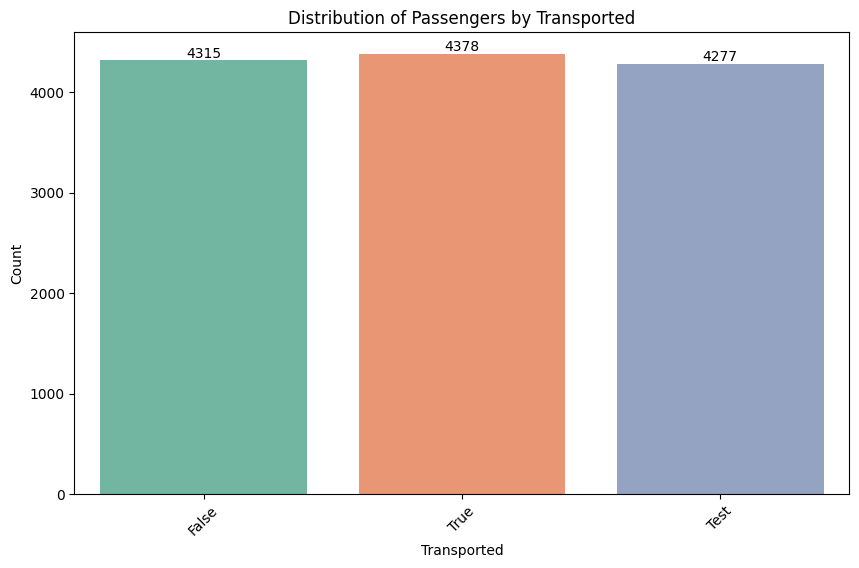

In [71]:
# Plot the distribution of the "HomePlanet" column
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Transported', palette='Set2')
plt.title('Distribution of Passengers by Transported')
plt.xlabel('Transported')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Annotate the bars with count values
for p in ax.patches:
    if p.get_height() > 0:  # Exclude bars with a count of 0
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

In [72]:
df['Transported'].isnull().sum()

0

In [103]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from yellowbrick.classifier import ClassPredictionError

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay




In [74]:
# Apply dummy encoding to 'HomePlanet,' 'Destination,' and 'Deck' for both train and test sets
categorical_columns = ['HomePlanet', 'Destination', 'Deck']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
##test = pd.get_dummies(test, columns=categorical_columns, drop_first=True)

In [75]:
columns = df.columns.tolist()
columns.remove('Transported')
columns.append('Transported')
df = df[columns]

In [76]:
df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Number,CabinNumber,Side,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Transported
0,False,468.0,False,0.0,0.0,0.0,0.0,0.0,0001,01,0.0,0,True,False,False,False,True,True,False,False,False,False,False,False,False
1,False,288.0,False,109.0,9.0,25.0,549.0,44.0,0002,01,0.0,1,False,False,False,False,True,False,False,False,False,True,False,False,True
2,False,696.0,True,43.0,3576.0,0.0,6715.0,49.0,0003,01,0.0,1,True,False,False,False,True,False,False,False,False,False,False,False,False
3,False,396.0,False,0.0,1283.0,371.0,3329.0,193.0,0003,02,0.0,1,True,False,False,False,True,False,False,False,False,False,False,False,False
4,False,192.0,False,303.0,70.0,151.0,565.0,2.0,0004,01,1.0,1,False,False,False,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,True,408.0,False,0.0,0.0,0.0,0.0,0.0,9266,02,1496.0,1,False,False,False,False,True,False,False,False,False,False,True,False,Test
12966,False,504.0,False,0.0,847.0,17.0,10.0,144.0,9269,01,28.0,1,False,False,False,False,True,False,False,False,False,False,True,False,Test
12967,True,60.0,False,0.0,0.0,0.0,0.0,0.0,9271,01,296.0,0,False,True,False,False,False,False,False,True,False,False,False,False,Test
12968,False,864.0,False,0.0,2680.0,0.0,0.0,523.0,9273,01,297.0,0,True,False,False,True,False,False,False,True,False,False,False,False,Test


In [77]:
train = df[df['Transported'] != 'Test']
test = df[df['Transported'] == 'Test']


In [78]:
test = test.drop('Transported', axis=1)

In [79]:
train = train.astype(int)

In [80]:
test = test.astype(int)

In [81]:
train

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Number,CabinNumber,Side,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Transported
0,0,468,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0
1,0,288,0,109,9,25,549,44,2,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
2,0,696,1,43,3576,0,6715,49,3,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
3,0,396,0,0,1283,371,3329,193,3,2,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
4,0,192,0,303,70,151,565,2,4,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,492,1,0,6819,0,1643,74,9276,1,98,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8689,1,216,0,0,0,0,0,0,9278,1,1499,1,0,0,0,1,0,0,0,0,0,0,1,0,0
8690,0,312,0,0,0,1872,1,0,9279,1,1500,1,0,0,0,0,1,0,0,0,0,0,1,0,1
8691,0,384,0,0,1049,0,353,3235,9280,1,608,1,1,0,0,0,0,0,0,0,1,0,0,0,0


In [82]:
test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Number,CabinNumber,Side,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
8693,1,324,0,0,0,0,0,0,13,1,3,1,0,0,0,0,1,0,0,0,0,0,1,0
8694,0,228,0,0,9,0,2823,0,18,1,4,1,0,0,0,0,1,0,0,0,0,1,0,0
8695,1,372,0,0,0,0,0,0,19,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0
8696,0,456,0,0,6652,0,181,585,21,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0
8697,0,240,0,10,0,635,0,0,23,1,5,1,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,1,408,0,0,0,0,0,0,9266,2,1496,1,0,0,0,0,1,0,0,0,0,0,1,0
12966,0,504,0,0,847,17,10,144,9269,1,28,1,0,0,0,0,1,0,0,0,0,0,1,0
12967,1,60,0,0,0,0,0,0,9271,1,296,0,0,1,0,0,0,0,0,1,0,0,0,0
12968,0,864,0,0,2680,0,0,523,9273,1,297,0,1,0,0,1,0,0,0,1,0,0,0,0


In [83]:
print('train set: ', train.shape)
print('test set: ', test.shape)

train set:  (8693, 25)
test set:  (4277, 24)


In [84]:
# Define the features (X) and target (y) for both train and test sets
X = train.drop('Transported', axis=1)
y = train['Transported']



In [85]:
X

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Number,CabinNumber,Side,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,0,468,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0
1,0,288,0,109,9,25,549,44,2,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,0,696,1,43,3576,0,6715,49,3,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0
3,0,396,0,0,1283,371,3329,193,3,2,0,1,1,0,0,0,1,0,0,0,0,0,0,0
4,0,192,0,303,70,151,565,2,4,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,492,1,0,6819,0,1643,74,9276,1,98,0,1,0,0,0,0,0,0,0,0,0,0,0
8689,1,216,0,0,0,0,0,0,9278,1,1499,1,0,0,0,1,0,0,0,0,0,0,1,0
8690,0,312,0,0,0,1872,1,0,9279,1,1500,1,0,0,0,0,1,0,0,0,0,0,1,0
8691,0,384,0,0,1049,0,353,3235,9280,1,608,1,1,0,0,0,0,0,0,0,1,0,0,0


In [86]:
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int32

In [87]:
test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Number,CabinNumber,Side,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
8693,1,324,0,0,0,0,0,0,13,1,3,1,0,0,0,0,1,0,0,0,0,0,1,0
8694,0,228,0,0,9,0,2823,0,18,1,4,1,0,0,0,0,1,0,0,0,0,1,0,0
8695,1,372,0,0,0,0,0,0,19,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0
8696,0,456,0,0,6652,0,181,585,21,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0
8697,0,240,0,10,0,635,0,0,23,1,5,1,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,1,408,0,0,0,0,0,0,9266,2,1496,1,0,0,0,0,1,0,0,0,0,0,1,0
12966,0,504,0,0,847,17,10,144,9269,1,28,1,0,0,0,0,1,0,0,0,0,0,1,0
12967,1,60,0,0,0,0,0,0,9271,1,296,0,0,1,0,0,0,0,0,1,0,0,0,0
12968,0,864,0,0,2680,0,0,523,9273,1,297,0,1,0,0,1,0,0,0,1,0,0,0,0


In [88]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=101)

In [89]:
scaler = StandardScaler()
X_train_scalled = scaler.fit_transform(X_train)
X_test_scalled = scaler.fit_transform(X_test)
test_scalled = scaler.fit_transform(test)

## Logistic Regression 

In [90]:
logistic_regression = LogisticRegression()

# Define hyperparameters for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear'],  # Solver for logistic regression
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Perform grid search using cross-validation
grid_search_LR = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search_LR.fit(X_train_scalled, y_train)

# Get the best hyperparameters from grid search
model_LogReg = grid_search_LR.best_estimator_
best_params_LogReg = grid_search_LR.best_params_

# Train the best model on the entire training set
model_LogReg.fit(X_train_scalled, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [91]:

y_train_pred_LogReg = model_LogReg.predict(X_train_scalled)
y_test_pred_LogReg = model_LogReg.predict(X_test_scalled)
y_test_pred_prob_LogReg = model_LogReg.predict_proba(X_test_scalled)[:, 1]

accuracy_LogReg = accuracy_score(y_test, y_test_pred_LogReg)
auc_LogReg = roc_auc_score(y_test, y_test_pred_prob_LogReg)

classification_rep_train_LogReg = classification_report(y_train, y_train_pred_LogReg)
classification_rep_test_LogReg = classification_report(y_test, y_test_pred_LogReg)



In [92]:
# Print the results
print("Best Hyperparameters:", best_params_LogReg)
print("Accuracy:", accuracy_LogReg)
print()

print("Classification Report Train:")
print(classification_rep_train_LogReg)
print()
print("Classification Report Test:")
print(classification_rep_test_LogReg)
print()

print('AUC:')
print(auc_LogReg)

Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.7998849913743531

Classification Report Train:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      3438
           1       0.78      0.81      0.80      3516

    accuracy                           0.79      6954
   macro avg       0.79      0.79      0.79      6954
weighted avg       0.79      0.79      0.79      6954


Classification Report Test:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       877
           1       0.79      0.82      0.80       862

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739


AUC:
0.8866826107776195


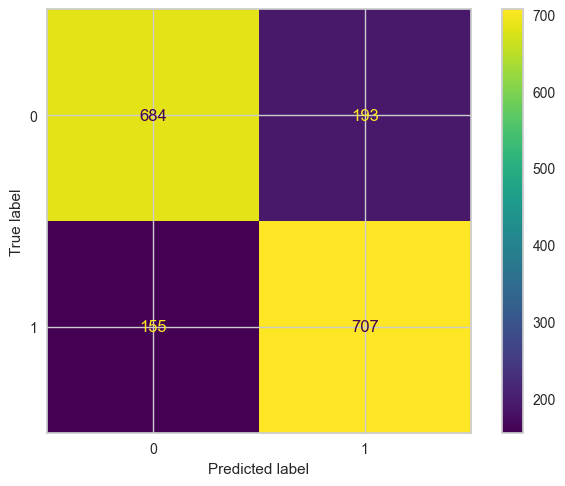

In [105]:
ConfusionMatrixDisplay.from_estimator( model_LogReg, X_test_scalled, y_test);

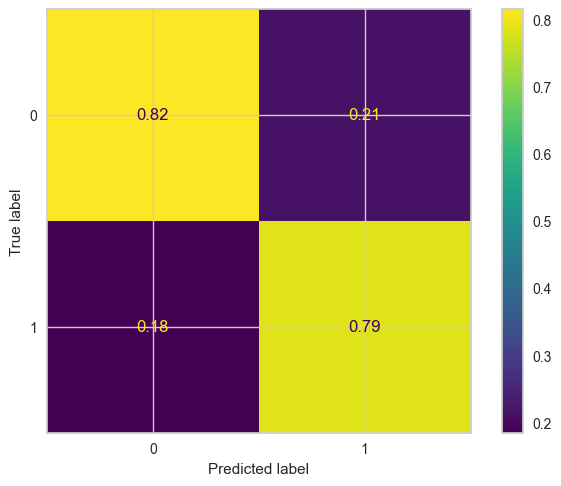

In [104]:
ConfusionMatrixDisplay.from_estimator( model_LogReg, X_test_scalled, y_test, normalize='pred');

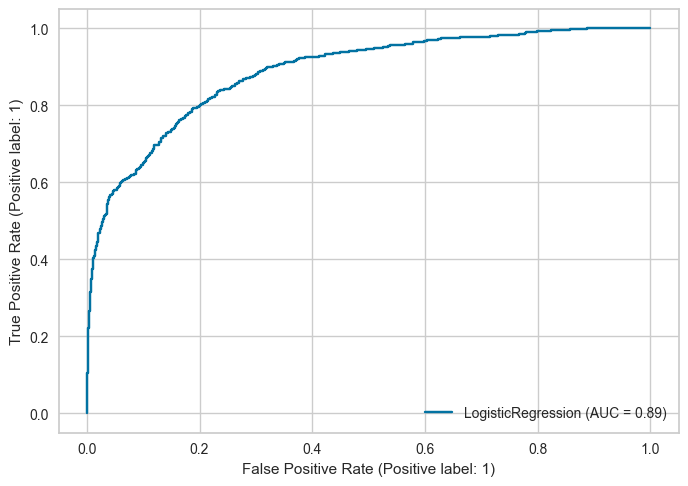

In [106]:
roc_curve_LogReg = RocCurveDisplay.from_estimator(model_LogReg, X_test_scalled, y_test)
auc_value_LogReg = roc_curve_LogReg.roc_auc

In [107]:
score_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'])

In [109]:
new_row = {
    'Model': 'model_LogReg',
    'Accuracy': accuracy_score(y_test, y_test_pred_LogReg),
    'Precision': precision_score(y_test, y_test_pred_LogReg),
    'Recall': recall_score(y_test, y_test_pred_LogReg),
    'F1-Score': f1_score(y_test, y_test_pred_LogReg),
    'AUC': auc_value_LogReg
    }

# Add the new row to the DataFrame
score_df = score_df._append(new_row, ignore_index=True)
score_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,model_LogReg,0.799885,0.785556,0.820186,0.802497,0.886683


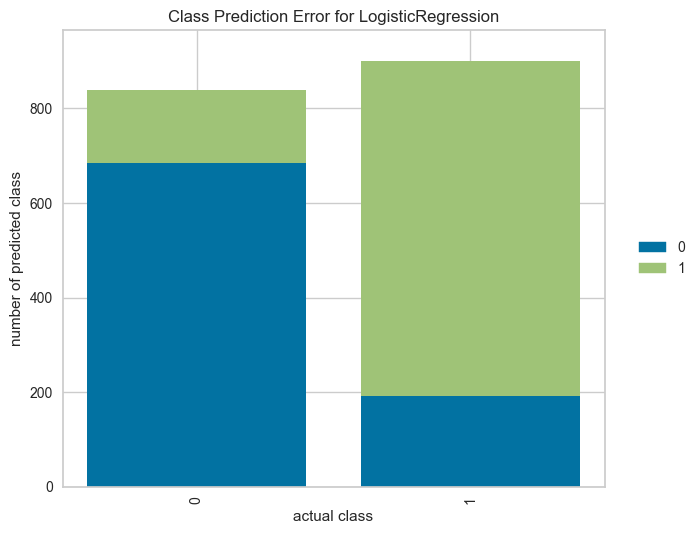

In [110]:
visualizer = ClassPredictionError(model_LogReg)

# Fit the training data to the visualizer
visualizer.fit(X_train_scalled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scalled, y_test)

# Draw visualization
visualizer.poof();

## Decision Trees

In [111]:
Decision_Tree = DecisionTreeClassifier(random_state=101)

param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3, 4, 5, 6, 7],
              "max_depth": [None, 2,3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "min_samples_split": [2, 3, 5, 6, 7,8,9]}

grid_search_DT = GridSearchCV(Decision_Tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1 )
grid_search_DT.fit(X_train,y_train)

model_DecTree = grid_search_DT.best_estimator_
best_params_DecTree = grid_search_DT.best_params_

model_DecTree.fit(X_train,y_train)


DecisionTreeClassifier(min_samples_leaf=7, random_state=101, splitter='random')

In [112]:
y_trein_pred_DecTree = model_DecTree.predict(X_train)

y_test_pred_DecTree = model_DecTree.predict(X_test)

y_test_pred_prob_DecTree = model_DecTree.predict_proba(X_test)[:, 1]  # Get probability predictions for class 1


accuracy_DecTree = accuracy_score(y_test, y_test_pred_DecTree)
auc_DecTree = roc_auc_score(y_test, y_test_pred_prob_DecTree)

classification_rep_train_DecTree = classification_report(y_train, y_trein_pred_DecTree)
classification_rep_test_DecTree = classification_report(y_test, y_test_pred_DecTree)


In [113]:
# Print the results
print("Best Hyperparameters:", best_params_DecTree)
print("Accuracy:", accuracy_DecTree)
print()

print("Classification Report Train:")
print(classification_rep_train_DecTree)
print()
print("Classification Report Test:")
print(classification_rep_test_DecTree)
print()

print("AUC Score:")
print(auc_DecTree)

Best Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy: 0.7786083956296722

Classification Report Train:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84      3438
           1       0.85      0.81      0.83      3516

    accuracy                           0.83      6954
   macro avg       0.83      0.83      0.83      6954
weighted avg       0.83      0.83      0.83      6954


Classification Report Test:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       877
           1       0.80      0.73      0.77       862

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739


AUC Score:
0.8654490762909837


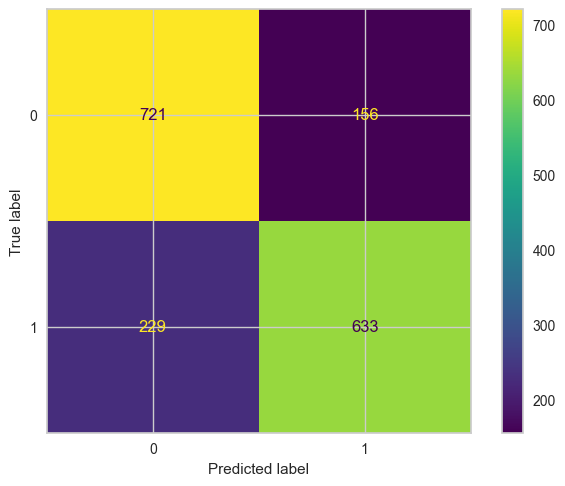

In [114]:
ConfusionMatrixDisplay.from_estimator(model_DecTree, X_test, y_test);

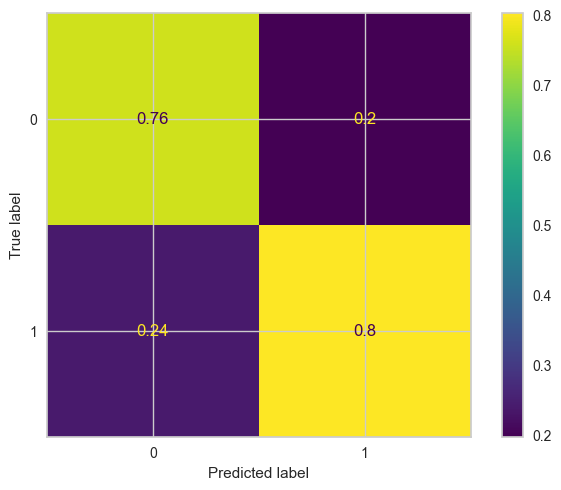

In [115]:
ConfusionMatrixDisplay.from_estimator(model_DecTree, X_test, y_test, normalize='pred');

In [116]:
from sklearn.tree import plot_tree

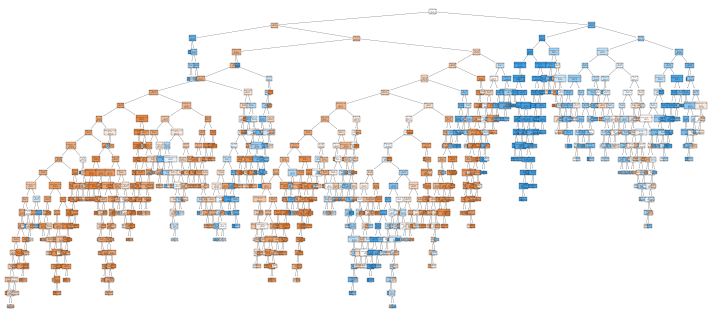

In [117]:
plt.figure(figsize=(18,8),dpi=50)
plot_tree(model_DecTree,filled=True, feature_names=X.columns);

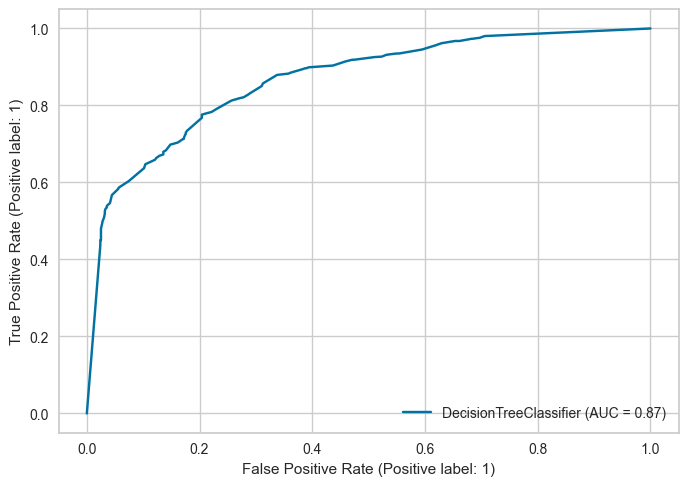

In [118]:
roc_curve_DecTree = RocCurveDisplay.from_estimator(model_DecTree, X_test, y_test);
auc_value_DecTree = roc_curve_DecTree.roc_auc

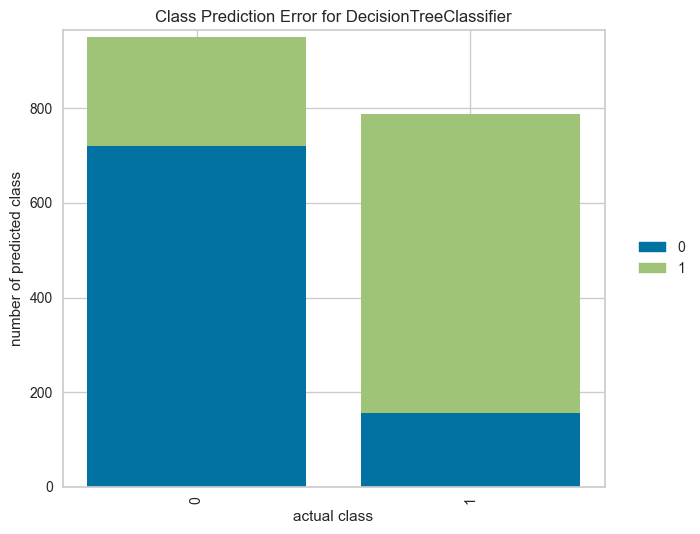

In [119]:
visualizer = ClassPredictionError(model_DecTree)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [120]:
feature_importance = pd.DataFrame(index=X.columns, data = model_DecTree.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
feature_importance

,Feature Importance
Deck_T,0.000000
VIP,0.000000
HomePlanet_Unknown,0.000043
Deck_D,0.000600
Destination_PSO J318.5-22,0.005270
Number,0.010020
Deck_F,0.010268
Deck_C,0.010493
Deck_B,0.011526
HomePlanet_Europa,0.013869


In [122]:
new_row = {
    'Model': 'model_DecTree',
    'Accuracy': accuracy_score(y_test, y_test_pred_DecTree),
    'Precision': precision_score(y_test, y_test_pred_DecTree),
    'Recall': recall_score(y_test, y_test_pred_DecTree),
    'F1-Score': f1_score(y_test, y_test_pred_DecTree),
    'AUC': auc_value_DecTree
}

# Add the new row to the DataFrame
score_df = score_df._append(new_row, ignore_index=True)
score_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,model_LogReg,0.799885,0.785556,0.820186,0.802497,0.886683
1,model_DecTree,0.778608,0.802281,0.734339,0.766808,0.865449


## Random Forest

In [123]:
Random_Forest = RandomForestClassifier()

param_grid = {'n_estimators':[50, 64, 100, 128, 300],
             'max_features':[2, 3, 4, "auto"],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

grid_search_RF = GridSearchCV(Random_Forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1 )
grid_search_RF.fit(X_train,y_train)

model_RandForest = grid_search_RF.best_estimator_
best_params_RandForest = grid_search_RF.best_params_

model_RandForest.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, max_features=4, min_samples_split=5,
                       n_estimators=64)

In [124]:

y_train_pred_RandForest = model_RandForest.predict(X_train)

y_test_pred_RandForest =model_RandForest.predict(X_test)

y_test_pred_prob_RandForest = model_RandForest.predict_proba(X_test)[:, 1]


accuracy_RandForest = accuracy_score(y_test, y_test_pred_RandForest)
auc_RandForest = roc_auc_score(y_test, y_test_pred_prob_RandForest)

classification_rep_train_RandForest = classification_report(y_train, y_train_pred_RandForest)
classification_rep_test_RandForest = classification_report(y_test, y_test_pred_RandForest)

In [125]:
# Print the results
print("Best Hyperparameters:", best_params_RandForest)
print("Accuracy:", accuracy_RandForest)
print()

print("Classification Report Train:")
print(classification_rep_train_RandForest)
print()
print("Classification Report Test:")
print(classification_rep_test_RandForest)
print()

print('AUC:')
print(auc_RandForest)

Best Hyperparameters: {'max_depth': 9, 'max_features': 4, 'min_samples_split': 5, 'n_estimators': 64}
Accuracy: 0.8073605520414031

Classification Report Train:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      3438
           1       0.83      0.86      0.85      3516

    accuracy                           0.84      6954
   macro avg       0.84      0.84      0.84      6954
weighted avg       0.84      0.84      0.84      6954


Classification Report Test:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       877
           1       0.80      0.82      0.81       862

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739


AUC:
0.8964587406445195


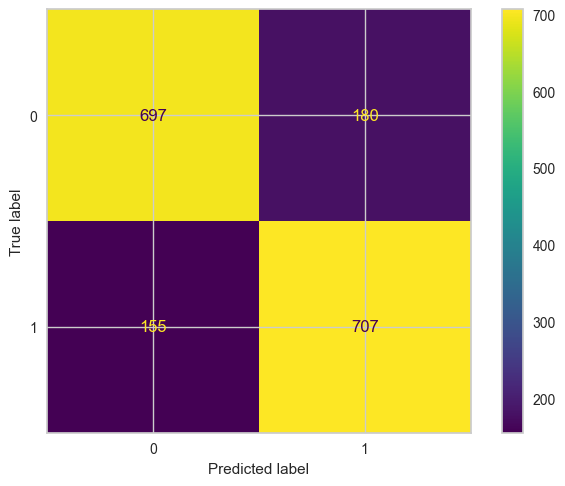

In [126]:
ConfusionMatrixDisplay.from_estimator(model_RandForest, X_test, y_test);

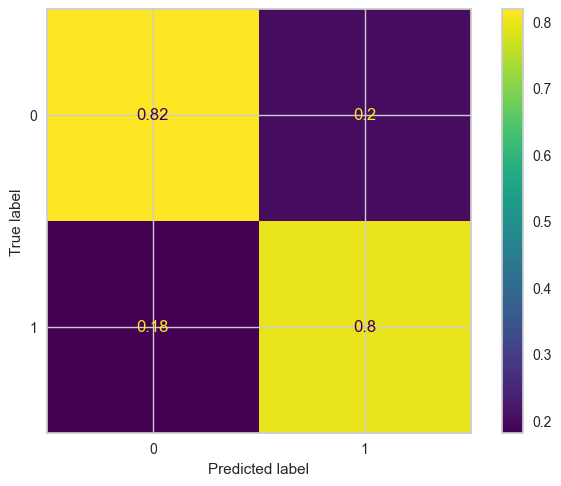

In [127]:
ConfusionMatrixDisplay.from_estimator(model_RandForest, X_test, y_test, normalize='pred');

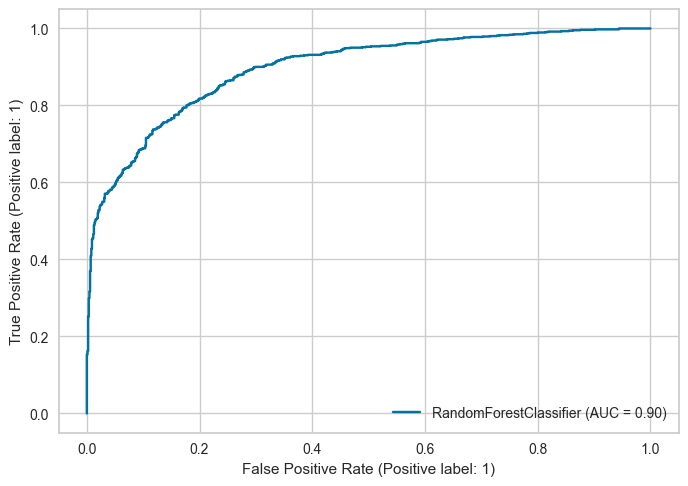

In [128]:
roc_curve_RF = RocCurveDisplay.from_estimator(model_RandForest, X_test, y_test);
auc_value_RF = roc_curve_RF.roc_auc

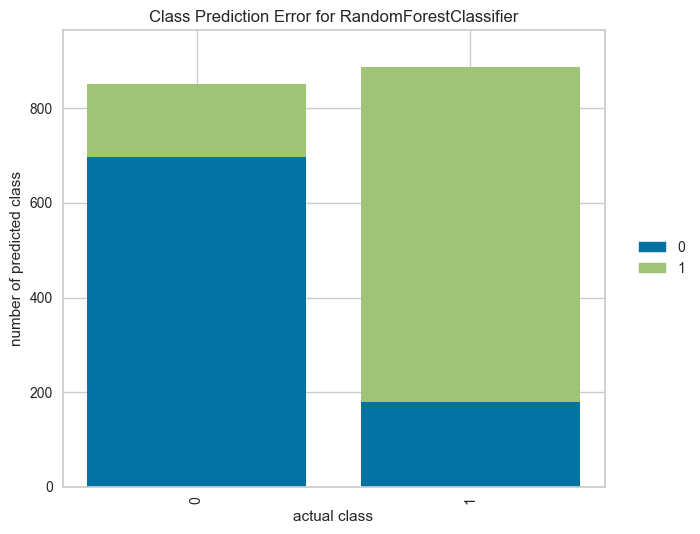

In [129]:
visualizer = ClassPredictionError(model_RandForest)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [130]:
df_f_l = pd.DataFrame(index=X.columns, data = model_RandForest.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_l

,Feature Importance
Deck_T,0.000006
VIP,0.001758
HomePlanet_Unknown,0.001858
Deck_D,0.002442
Destination_PSO J318.5-22,0.003384
Destination_TRAPPIST-1e,0.007112
Deck_C,0.009494
Number,0.010201
Deck_B,0.011301
Deck_F,0.011503


In [131]:
new_row = {
    'Model': 'model_RandForest',
    'Accuracy': accuracy_score(y_test, y_test_pred_RandForest),
    'Precision': precision_score(y_test, y_test_pred_RandForest),
    'Recall': recall_score(y_test, y_test_pred_RandForest),
    'F1-Score': f1_score(y_test, y_test_pred_RandForest),
    'AUC': auc_value_RF
}

# Add the new row to the DataFrame
score_df = score_df._append(new_row, ignore_index=True)
score_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,model_LogReg,0.799885,0.785556,0.820186,0.802497,0.886683
1,model_DecTree,0.778608,0.802281,0.734339,0.766808,0.865449
2,model_RandForest,0.807361,0.797069,0.820186,0.808462,0.896459


## XGBoost

In [132]:
XGBoost = XGBClassifier()

param_grid = {'n_estimators':[50, 64, 100, 128, 200],
              'max_depth':[3,4,5],
              'learning_rate': [0.1, 0.2],
              'subsample':[0.5, 0.8, 1],
              'colsample_bytree':[0.5,0.7, 1]}

grid_search_XGB = GridSearchCV(XGBoost, param_grid, cv=5, scoring='accuracy', n_jobs=-1 )
grid_search_XGB.fit(X_train,y_train)

model_XGBoost = grid_search_XGB.best_estimator_
best_params_XGBoost = grid_search_XGB.best_params_

model_XGBoost.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=64, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [133]:

y_train_pred_XGBoost = model_XGBoost.predict(X_train)
y_test_pred_XGBoost =model_XGBoost.predict(X_test)
y_test_pred_prob_XGBoost = model_XGBoost.predict_proba(X_test)[:, 1]


accuracy_XGBoost = accuracy_score(y_test, y_test_pred_XGBoost)
auc_XGBoost = roc_auc_score(y_test, y_test_pred_prob_XGBoost)

classification_rep_train_XGBoost = classification_report(y_train, y_train_pred_XGBoost)
classification_rep_test_XGBoost = classification_report(y_test, y_test_pred_XGBoost)

In [134]:
# Print the results
print("Best Hyperparameters:", best_params_XGBoost)
print("Accuracy:", accuracy_XGBoost)
print()

print("Classification Report Train:")
print(classification_rep_train_XGBoost)
print()
print("Classification Report Test:")
print(classification_rep_test_XGBoost)
print()

print("AUC Score:")
print(auc_XGBoost)

Best Hyperparameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 64, 'subsample': 0.8}
Accuracy: 0.8177113283496262

Classification Report Train:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      3438
           1       0.84      0.85      0.85      3516

    accuracy                           0.84      6954
   macro avg       0.84      0.84      0.84      6954
weighted avg       0.84      0.84      0.84      6954


Classification Report Test:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       877
           1       0.80      0.84      0.82       862

    accuracy                           0.82      1739
   macro avg       0.82      0.82      0.82      1739
weighted avg       0.82      0.82      0.82      1739


AUC Score:
0.9097746747904029


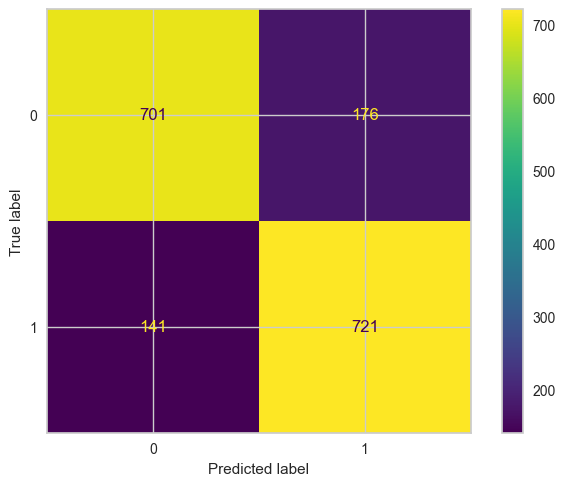

In [135]:
ConfusionMatrixDisplay.from_estimator(model_XGBoost, X_test, y_test);

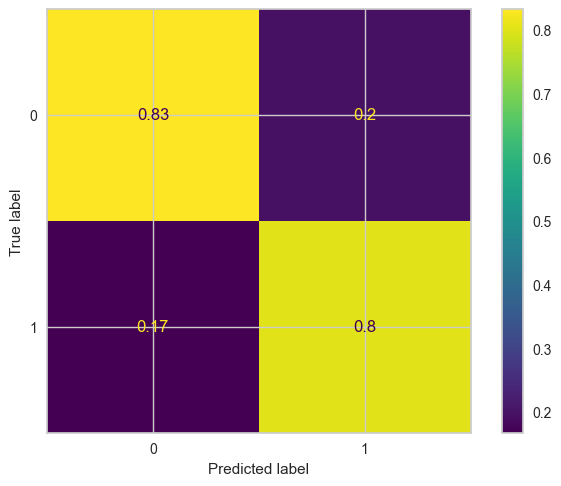

In [136]:
ConfusionMatrixDisplay.from_estimator(model_XGBoost, X_test, y_test, normalize='pred');

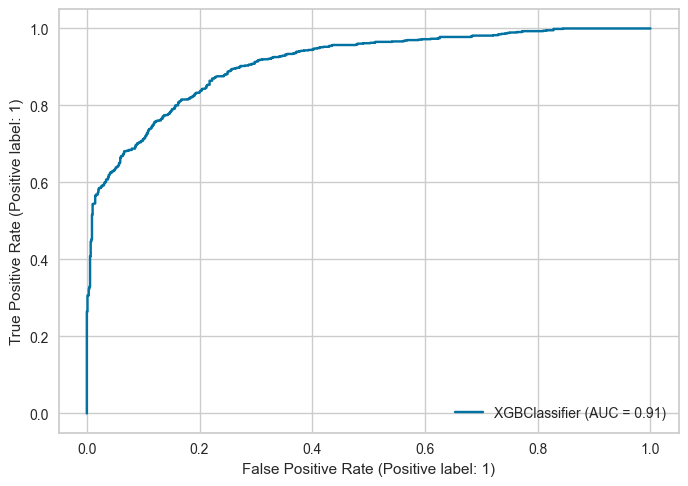

In [137]:
roc_curve_XGB = RocCurveDisplay.from_estimator(model_XGBoost, X_test, y_test);
auc_value_XGB = roc_curve_XGB.roc_auc

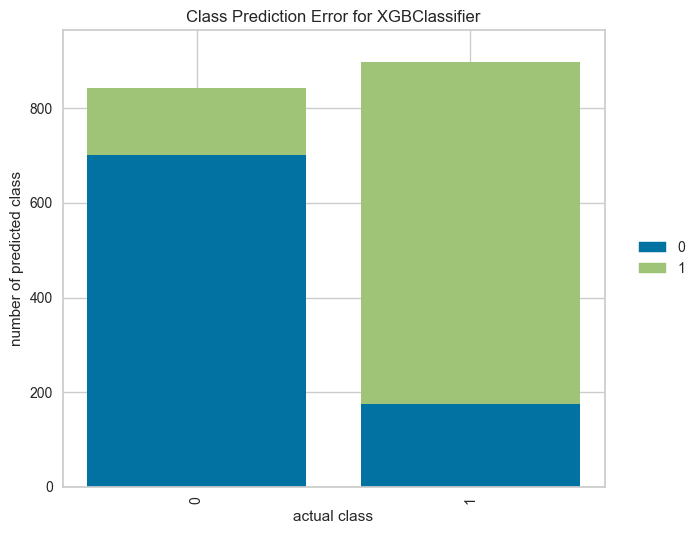

In [138]:
visualizer = ClassPredictionError(model_XGBoost)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [139]:
new_row = {
    'Model': 'model_XGBoost',
    'Accuracy': accuracy_score(y_test, y_test_pred_XGBoost),
    'Precision': precision_score(y_test, y_test_pred_XGBoost),
    'Recall': recall_score(y_test, y_test_pred_XGBoost),
    'F1-Score': f1_score(y_test, y_test_pred_XGBoost),
    'AUC': auc_value_XGB
}

# Add the new row to the DataFrame
score_df = score_df._append(new_row, ignore_index=True)
score_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,model_LogReg,0.799885,0.785556,0.820186,0.802497,0.886683
1,model_DecTree,0.778608,0.802281,0.734339,0.766808,0.865449
2,model_RandForest,0.807361,0.797069,0.820186,0.808462,0.896459
3,model_XGBoost,0.817711,0.803790,0.836427,0.819784,0.909775


## Support Vector Machines (SVM)

In [140]:
SVM = SVC()

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

grid_search_SVM = GridSearchCV(SVM, param_grid, cv=5, scoring='accuracy', n_jobs=-1 )
grid_search_SVM.fit(X_train_scalled,y_train)

model_SVM = grid_search_SVM.best_estimator_
best_params_SVM = grid_search_SVM.best_params_

model_SVM.fit(X_train_scalled,y_train)

SVC(C=100, gamma=0.001)

In [141]:
y_trein_pred_SVM = model_SVM.predict(X_train_scalled)

y_test_pred_SVM = model_SVM.predict(X_test_scalled)


accuracy_SVM = accuracy_score(y_test, y_test_pred_SVM)


classification_rep_train_SVM = classification_report(y_train, y_trein_pred_SVM)
classification_rep_test_SVM = classification_report(y_test, y_test_pred_SVM)

In [142]:
# Print the results
print("Best Hyperparameters:", best_params_SVM)
print("Accuracy:", accuracy_SVM)
print()

print("Classification Report Train:")
print(classification_rep_train_SVM)
print()
print("Classification Report Test:")
print(classification_rep_test_SVM)


Best Hyperparameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy: 0.8079355951696378

Classification Report Train:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      3438
           1       0.80      0.82      0.81      3516

    accuracy                           0.80      6954
   macro avg       0.81      0.80      0.80      6954
weighted avg       0.80      0.80      0.80      6954


Classification Report Test:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       877
           1       0.80      0.82      0.81       862

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



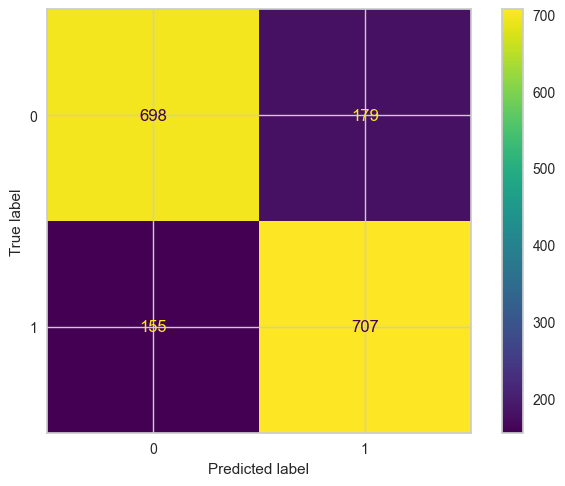

In [143]:
ConfusionMatrixDisplay.from_estimator(model_SVM, X_test_scalled, y_test);

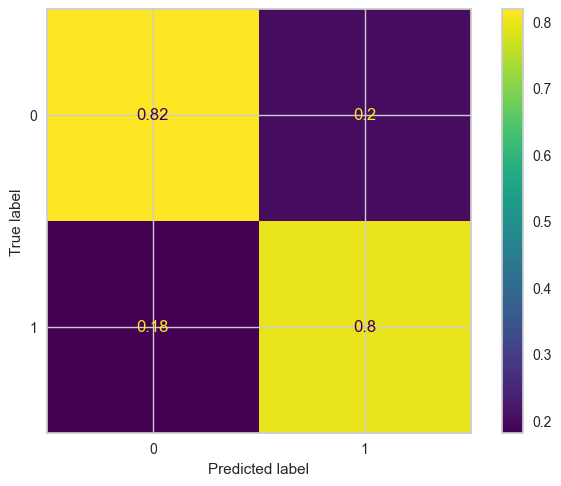

In [144]:
ConfusionMatrixDisplay.from_estimator(model_SVM, X_test_scalled, y_test, normalize='pred');

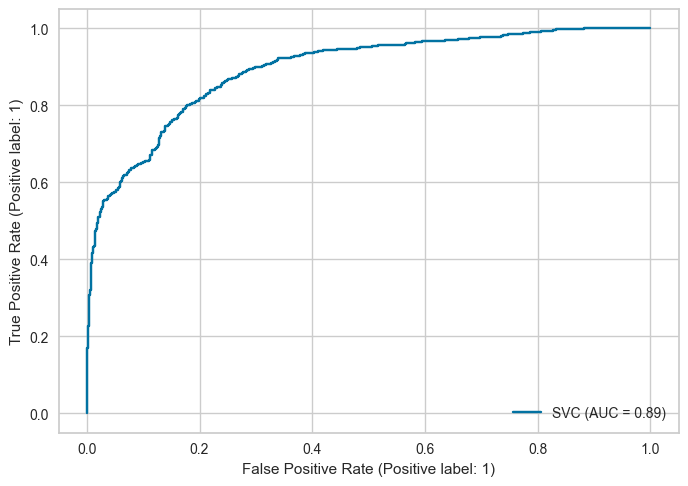

In [145]:
roc_curve_SVM = RocCurveDisplay.from_estimator(model_SVM, X_test_scalled, y_test);

auc_value_SVM = roc_curve_SVM.roc_auc

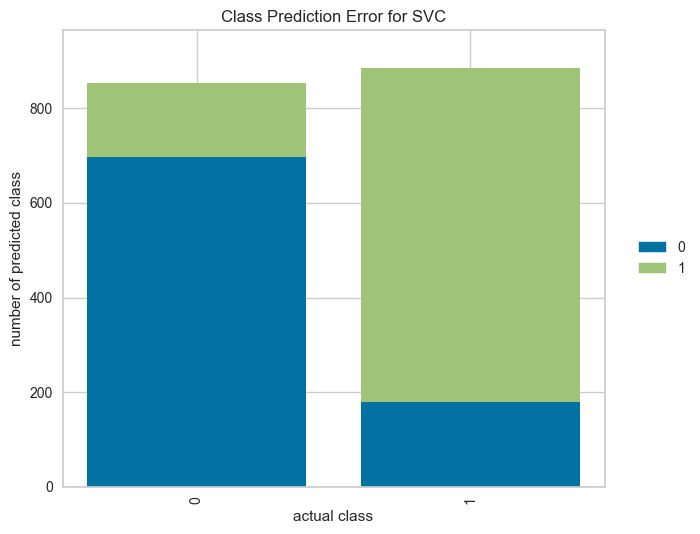

In [146]:
visualizer = ClassPredictionError(model_SVM)

# Fit the training data to the visualizer
visualizer.fit(X_train_scalled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scalled, y_test)

# Draw visualization
visualizer.poof();

In [148]:
new_row = {
    'Model': 'model_SVM',
    'Accuracy': accuracy_score(y_test, y_test_pred_SVM),
    'Precision': precision_score(y_test, y_test_pred_SVM),
    'Recall': recall_score(y_test, y_test_pred_SVM),
    'F1-Score': f1_score(y_test, y_test_pred_SVM),
    'AUC': auc_value_SVM
}

# Add the new row to the DataFrame
score_df = score_df._append(new_row, ignore_index=True)
score_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,model_LogReg,0.799885,0.785556,0.820186,0.802497,0.886683
1,model_DecTree,0.778608,0.802281,0.734339,0.766808,0.865449
2,model_RandForest,0.807361,0.797069,0.820186,0.808462,0.896459
3,model_XGBoost,0.817711,0.803790,0.836427,0.819784,0.909775
4,model_SVM,0.807936,0.797968,0.820186,0.808924,0.893416


## CONCLUSION

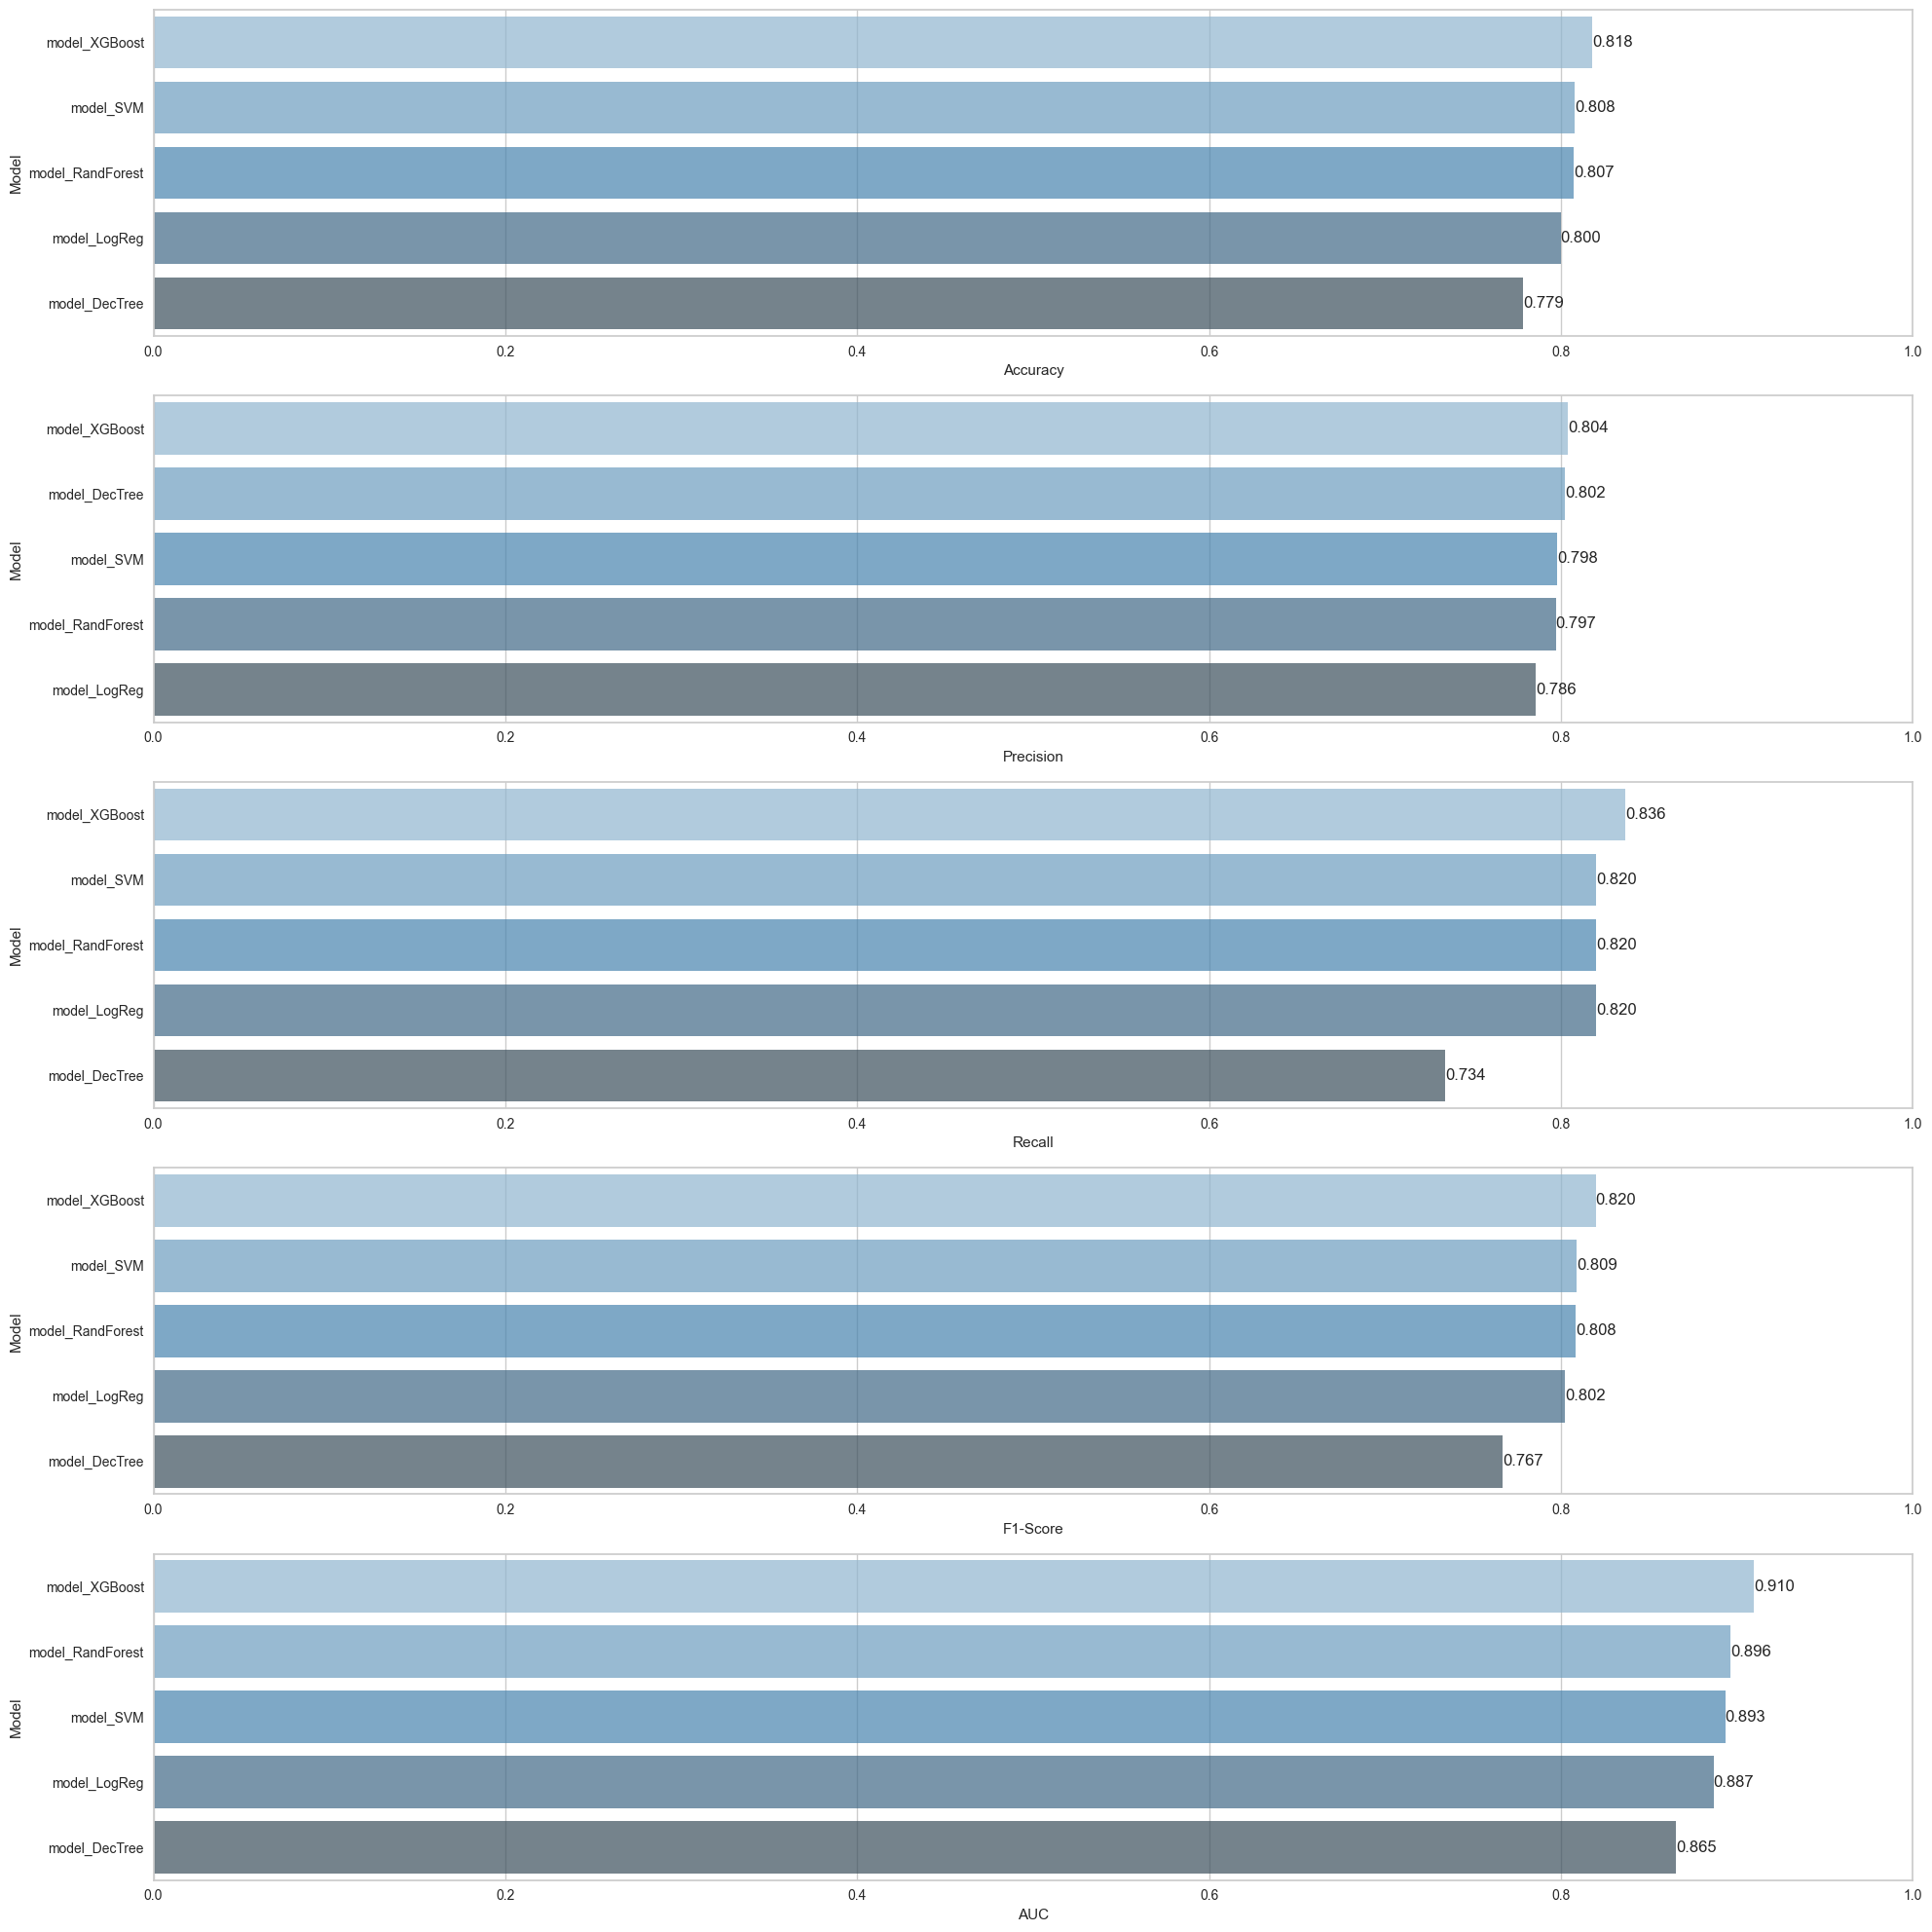

In [151]:
def labels(ax):
    for p in ax.patches:
        width = p.get_width()
        ax.text(width,
                p.get_y() + p.get_height() / 2,
                '{:1.3f}'.format(width),
                ha='left',
                va='center')

plt.figure(figsize=(20, 20))

bar_width = 0.6  # Adjust the width of the bars

plt.subplot(511)
score_df = score_df.sort_values(by="Accuracy", ascending=False)
ax = sns.barplot(x="Accuracy", y="Model", data=score_df, palette="Blues_d", ci=None, alpha=0.7)
ax.set_xlim(0, 1)  # Set the x-axis limits for consistency
ax.set_xlabel("Accuracy")
labels(ax)

plt.subplot(512)
score_df = score_df.sort_values(by="Precision", ascending=False)
ax = sns.barplot(x="Precision", y="Model", data=score_df, palette="Blues_d", ci=None, alpha=0.7)
ax.set_xlim(0, 1)
ax.set_xlabel("Precision")
labels(ax)

plt.subplot(513)
score_df = score_df.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=score_df, palette="Blues_d", ci=None, alpha=0.7)
ax.set_xlim(0, 1)
ax.set_xlabel("Recall")
labels(ax)

plt.subplot(514)
score_df = score_df.sort_values(by="F1-Score", ascending=False)
ax = sns.barplot(x="F1-Score", y="Model", data=score_df, palette="Blues_d", ci=None, alpha=0.7)
ax.set_xlim(0, 1)
ax.set_xlabel("F1-Score")
labels(ax)

plt.subplot(515)
score_df = score_df.sort_values(by="AUC", ascending=False)
ax = sns.barplot(x="AUC", y="Model", data=score_df, palette="Blues_d", ci=None, alpha=0.7)
ax.set_xlim(0, 1)
ax.set_xlabel("AUC")
labels(ax)

plt.tight_layout()
plt.show()




# Model Evaluation and Selection

In this binary classification problem, we have trained and evaluated several machine learning models to determine the best-performing one. Let's first discuss the key evaluation metrics used and then make a final model selection.

## Evaluation Metrics

1. **Accuracy:**
   - Accuracy measures the overall correctness of the model. It tells us the proportion of correct predictions.

2. **Precision:**
   - Precision is the ability of a model to make correct positive predictions. It indicates the proportion of true positive predictions among all positive predictions made by the model.

3. **Recall:**
   - Recall measures the model's ability to capture all positive instances. It indicates the proportion of true positive predictions among all actual positive instances.

4. **F1-Score:**
   - The F1-Score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

5. **AUC (Area Under the ROC Curve):**
   - AUC measures the model's ability to distinguish between positive and negative cases. A higher AUC indicates better discrimination ability.

## Model Results

Here are the results for the models:

| Model           | Accuracy | Precision | Recall | F1-Score | AUC     |
|-----------------|----------|-----------|--------|----------|---------|
| Logistic Regression | 0.799 | 0.785 | 0.820 | 0.802 | 0.886 |
| Decision Tree       | 0.778 | 0.802 | 0.734 | 0.766 | 0.865 |
| Random Forest       | 0.807 | 0.797 | 0.820 | 0.808 | 0.896 |
| XGBoost             | 0.817 | 0.803 | 0.836 | 0.819 | 0.909 |
| Support Vector Machine | 0.807 | 0.797 | 0.820 | 0.808 | 0.893 |

## Model Selection

After evaluating the models based on the metrics mentioned above, we have chosen XGBoost as the best-performing model. Here's why:

- **XGBoost** demonstrated the highest precision, recall, F1-Score, and AUC among all models, indicating that it is better at correctly identifying positive cases and distinguishing between positive and negative cases.
- The balance between precision and recall, as indicated by the F1-Score, was also favorable for XGBoost.
- The AUC, which measures the model's ability to discriminate between positive and negative cases, was highest for XGBoost, showing its superior overall performance.

While XGBoost is our top choice, it's important to consider other practical factors, such as computational efficiency and interpretability, based on your specific business needs. Logistic Regression may be a good alternative if interpretability is a critical requirement.


In [152]:
test_XGBoost = model_XGBoost.predict(test)

test_data_result = pd.DataFrame(test_XGBoost, index=test_data['PassengerId'])
test_data_result

,0
PassengerId,
0013_01,1
0018_01,0
0019_01,1
0021_01,1
0023_01,1
...,...
9266_02,1
9269_01,0
9271_01,1
